# Alex Dvorak, Project 3, August 7, 2021

In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Importing General Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Model Building Modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV

# Metric Module
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, make_scorer

In [2]:
lmd = pd.read_csv('Loan_Modelling.csv') # lmd, Loan Model Dataset

##### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

##### Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [3]:
lmd.head() # initial view of the dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
lmd.duplicated().sum() # checking for duplicate rows

0

In [5]:
lmd.isnull().sum() # checking for null values

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
lmd.info() # checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
lmd.describe().T # initial EDA, looking for unreasonable values

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Quick view of dataset:

The dataset looks very clean, though some features needed lightly cleaned.  

There are no strings to remove.  
There are no null values.  

The Experience feature has negative values which is not possible.     
The Education feature will be changed into a categorical variable with the names of the categories assigned.  
The Mortgage feature has most of the values as 0.  
The other features seem ready at a glance. They will be further explored in EDA.  
The ID feature can be removed after having confirmed that there are no duplicate rows.  
The ZIPCode feature can be used to extract the state. The range looks fairly small for zipcodes.  

In [8]:
lmd.drop('ID', axis=1, inplace=True) # removing the ID feature

education_names = {1 : "Undergrad", 2: "Graduate", 3: "Advanced/Professional"} # nominal values given in context
lmd['Education'].replace(education_names, inplace=True) # replacing integers with nominal values
lmd['Education'] = lmd['Education'].astype('category') # changing Education to a categorical variable

### ZIPCode Processing
The range is from 90005 to 96651.  
According to wikipedia, the zipcodes for California are 900 - 961 and the zipcodes for Armed Forces Pacific are 962-966.  
Using https://california.hometownlocator.com/zip-codes/counties.cfm, I will manually create a dictionary of the California counties.

#####  Post-exploratory note
92717, 93077, 92634, 96651, and 92709 are ZIPCodes in the dataset, but they do not exist in the current United States Postal Service directory. However, the counties can be found with deeper exploration so they were added afterward.  

Additionally, some zipcodes were included in multiple counties so the zipcode in the county with the closest context remained while the others were removed.  

In [9]:
# A dictionary of the zipcodes for each county in California and the zipcopes for the Armed Forces Pacific.
# This dictionary includes all zipcodes in the Loan Model Dataset (between 90005 and 96651).
counties_Cali_AP = {'Alameda':[94501, 94502, 94505, 94514, 94536, 94538, 94539, 94541, 94542, 94544, 94545, 94546, 94550, 94551,
                              94552, 94555, 94560, 94566, 94568, 94577, 94578, 94579, 94580, 94586, 94587, 94588, 94601, 94602,
                              94603, 94605, 94606, 94607, 94608, 94609, 94610, 94611, 94612, 94615, 94617, 94618, 94619, 94621,
                              94702, 94703, 94704, 94705, 94706, 94707, 94708, 94709, 94710, 95377, 95391, 94537, 94540, 94543,
                              94557, 94604, 94613, 94614, 94620, 94623, 94624, 94661, 94662, 94701, 94712, 94622, 94649, 94659,
                              94660, 94666, 94720],
                 'Alpine' : [96120, 95646],
                 'Amador' : [95629, 95640, 95642, 95665, 95666, 95669, 95685, 95689, 95601,95644, 95654, 95675, 95699],
                 'Butte' : [95901, 95914, 95916, 95917, 95925, 95926, 95928, 95930, 95938,95941, 95942, 95948, 95954, 
                            95965, 95966, 95968, 95969, 95973,95927, 95940, 95958, 95967, 95974, 95978, 95929, 95976],
                 'Calaveras' : [95222, 95223, 95228, 95230, 95232, 95236, 95245, 95246, 95247, 95249, 95251, 95252, 95255, 
                                95257, 95221, 95224, 95225, 95226, 95229, 95233, 95248, 95254],
                 'Colusa' : [95912, 95932, 95957, 95970, 95979, 95987, 95950, 95955],
                 'Contra Costa' : [94506, 94507, 94509, 94513, 94517, 94518, 94519, 94520, 94521, 94523, 94525, 
                                   94526, 94530, 94531, 94547, 94549, 94553, 94556, 94561, 94563, 94564, 94565, 94572, 
                                   94575, 94582, 94583, 94595, 94596, 94597, 94598, 94801, 94803, 94804, 
                                   94805, 94806, 94850, 94511, 94516, 94522, 94524, 94527, 94528, 94548, 94569, 94570, 94802, 
                                   94807, 94808, 94820, 94529],
                 'Del Norte' : [95531, 95543, 95548, 95567, 95538, 95532],
                 'El Dorado' : [95614, 95619, 95623, 95629, 95633, 95634, 95635, 95636, 95651, 95664, 95667, 95672, 95682, 
                                95684, 95709, 95720, 95726, 95735, 95762, 96150, 95613, 95656, 95721, 96142, 96151, 96152, 
                                96154, 96155, 96156, 96157, 96158],
                 'Fresno' : [93210, 93242, 93245, 93602, 93608, 93609, 93611, 93612, 93616, 93618, 93619, 93620, 93621, 93622, 
                             93625, 93626, 93628, 93630, 93631, 93640, 93641, 93646, 93648, 93650, 93651, 93652, 93654, 93656, 
                             93657, 93660, 93662, 93664, 93667, 93668, 93675, 93701, 93702, 93703, 93704, 93705, 93706, 93710, 
                             93711, 93720, 93721, 93722, 93723, 93725, 93726, 93727, 93728, 93730, 93737, 93234, 93605, 93606, 
                             93607, 93613, 93624, 93627, 93634, 93642, 93649, 93707, 93708, 93709, 93712, 93714, 93715, 93716, 
                             93717, 93718, 93729, 93744, 93745, 93747, 93755, 93771, 93772, 93773, 93774, 93775, 93776, 93777, 
                             93778, 93779, 93790, 93791, 93792, 93793, 93794, 93724, 93740, 93741, 93750, 93760, 93761, 93764, 
                             93765, 93786, 93844, 93888],
                 'Glenn' : [95920, 95939, 95943, 95963, 95970, 95988, 95913, 95951],
                 'Humboldt' : [95501, 95503, 95511, 95514, 95519, 95521, 95524, 95525, 95526, 95528, 95536, 95540, 95542, 95546,
                               95547, 95549, 95550, 95551, 95552, 95554, 95555, 95558, 95560, 95562, 95564, 95565, 95569, 95570,
                               95573, 95589, 95502, 95518, 95534, 95537, 95545, 95553, 95556, 95559, 95571],
                 'Imperial' : [92004, 92225, 92227, 92231, 92233, 92243, 92249, 92250, 92251, 92257, 92274, 92283, 92222, 92232,
                               92244, 92259, 92266, 92273, 92275, 92281],
                 'Inyo' : [92328, 93513, 93514, 93526, 93527, 93545, 92384, 92389, 93515, 93522, 93530, 93542, 93549],
                 'Kern' : [93203, 93205, 93206, 93215, 93224, 93225, 93226, 93238, 93240, 93241, 93243, 93249, 93250, 93251, 
                           93252, 93255, 93263, 93268, 93280, 93283, 93285, 93287, 93301, 93304, 93305, 93306, 93307, 93308, 
                           93309, 93311, 93312, 93313, 93314, 93501, 93505, 93516, 93518, 93523, 93527, 93531, 93536, 93555, 
                           93560, 93561, 93216, 93220, 93222, 93276, 93302, 93303, 93380, 93383, 93384, 93385, 93386, 93387, 
                           93388, 93389, 93390, 93502, 93504, 93519, 93528, 93554, 93556, 93558, 93581, 93596, 93524],
                 'Kings' : [93202, 93204, 93212, 93230, 93239, 93242, 93245, 93266, 93631, 93656, 93232, 93246],
                 'Lake' : [95422, 95423, 95443, 95451, 95453, 95457, 95458, 95461, 95464, 95467, 95469, 95485, 95493, 95424, 
                           95426, 95435],
                 'Lassen' : [96006, 96056, 96109, 96114, 96117, 96121, 96123, 96128, 96130, 96132, 96136, 96137, 96009, 96068, 
                             96113, 96119, 96127],
                 'Los Angeles' : [90001, 90002, 90003, 90004, 90005, 90006, 90007, 90008, 90010, 90011, 90012, 90013, 90014, 
                                  90015, 90016, 90017, 90018, 90019, 90020, 90021, 90022, 90023, 90024, 90025, 90026, 90027, 
                                  90028, 90029, 90031, 90032, 90033, 90034, 90035, 90036, 90037, 90038, 90039, 90040, 90041, 
                                  90042, 90043, 90044, 90045, 90046, 90047, 90048, 90049, 90056, 90057, 90058, 90059, 90061, 
                                  90062, 90063, 90064, 90065, 90066, 90067, 90068, 90069, 90071, 90077, 90079, 90094, 90134, 
                                  90201, 90210, 90211, 90212, 90220, 90221, 90222, 90230, 90232, 90240, 90241, 90242, 90245, 
                                  90247, 90248, 90249, 90250, 90254, 90255, 90260, 90261, 90262, 90265, 90266, 90270, 90272, 
                                  90274, 90275, 90277, 90278, 90280, 90290, 90291, 90292, 90293, 90301, 90302, 90303, 90304, 
                                  90305, 90311, 90401, 90402, 90403, 90404, 90405, 90501, 90502, 90503, 90504, 90505, 90506,
                                  90601, 90602, 90603, 90604, 90605, 90606, 90640, 90650, 90660, 
                                  90670, 90701, 90703, 90706, 90710, 90712, 90713, 90715, 90716, 90717, 90723, 90731, 90732, 
                                  90744, 90745, 90746, 90755, 90802, 90803, 90804, 90805, 90806, 90807, 90808, 90810, 90813, 
                                  90814, 90815, 90822, 90831, 90833, 91001, 91006, 91007, 91008, 91010, 91011, 91016, 91020, 
                                  91024, 91030, 91040, 91042, 91101, 91103, 91104, 91105, 91106, 91107, 91108, 91201, 91202, 
                                  91203, 91204, 91205, 91206, 91207, 91208, 91210, 91214, 91301, 91302, 91303, 91304, 91306, 
                                  91307, 91311, 91316, 91321, 91324, 91325, 91326, 91331, 91335, 91340, 91342, 91343, 91344, 
                                  91345, 91350, 91351, 91352, 91354, 91355, 91356, 91361, 91362, 91364, 91367, 91381, 91382, 
                                  91383, 91384, 91387, 91390, 91401, 91402, 91403, 91405, 91406, 91411, 91423, 91436, 91501,
                                  91502, 91504, 91505, 91506, 91601, 91602, 91604, 91605, 91606, 91607, 91608, 91702, 91706, 
                                  91711, 91722, 91723, 91724, 91731, 91732, 91733, 91740, 91741, 91744, 91745, 91746, 91748, 
                                  91750, 91754, 91755, 91765, 91766, 91767, 91768, 91770, 91773, 91775, 91776, 91780, 91789, 
                                  91790, 91791, 91792, 91801, 91803, 91804, 93243, 93510, 93532, 93534, 93535, 93536, 93543, 
                                  93544, 93550, 93551, 93552, 93553, 93560, 93563, 93591, 90009, 90030, 90050, 90051, 90052, 
                                  90053, 90054, 90055, 90060, 90070, 90072, 90073, 90075, 90076, 90078, 90080, 90081, 90082, 
                                  90083, 90086, 90087, 90091, 90093, 90202, 90209, 90213, 90223, 90224, 90231, 90233, 90239, 
                                  90251, 90264, 90267, 90294, 90295, 90296, 90306, 90307, 90308, 90309, 90310, 90312, 90406, 
                                  90407, 90408, 90409, 90410, 90411, 90507, 90508, 90509, 90510, 90607, 90608, 90609, 90610,
                                  90637, 90651, 90652, 90661, 90662, 90671, 90702, 90704, 90707, 90711, 90714, 90733, 90734, 
                                  90748, 90749, 90801, 90809, 90832, 90853, 91003, 91009, 91012, 91017, 91021, 91023, 91025, 
                                  91031, 91041, 91043, 91046, 91066, 91077, 91102, 91109, 91114, 91115, 91116, 91117, 91118, 
                                  91209, 91221, 91222, 91224, 91225, 91226, 91305, 91308, 91309, 91310, 91313, 91322, 91327, 
                                  91328, 91333, 91334, 91337, 91341, 91346, 91353, 91357, 91365, 91372, 91376, 91380, 91385, 
                                  91386, 91392, 91393, 91394, 91395, 91396, 91404, 91407, 91408, 91409, 91410, 91412, 91413, 
                                  91416, 91426, 91503, 91507, 91508, 91510, 91603, 91609, 91610, 91614, 91615, 91616, 91617,
                                  91618, 91714, 91715, 91716, 91734, 91747, 91749, 91759, 91769, 91778, 91788, 91793, 91802, 
                                  91896, 91899, 93539, 93584, 93586, 93590, 90074, 90084, 90088, 90089, 90090, 90095, 90096,
                                  90099, 90189, 90263, 90639, 90747, 90840, 90842, 90844, 90846, 90847, 90848, 90895, 91110, 
                                  91121, 91123, 91124, 91125, 91126, 91129, 91182, 91184, 91185, 91188, 91189, 91199, 91329, 
                                  91330, 91371, 91470, 91482, 91495, 91496, 91499, 91521, 91522, 91523, 91526, 91611, 91612, 
                                  91735, 91756, 91771, 91772, 93599],
                 'Madera' : [93601, 93604, 93610, 93614, 93623, 93636, 93637, 93638, 93643, 93644, 
                             93645, 93653, 93669, 93639],
                 'Marin' : [94901, 94903, 94904, 94920, 94924, 94925, 94930, 94937, 94939, 94940, 94941, 94945, 94946, 94947, 
                            94949, 94952, 94956, 94960, 94965, 94970, 94974, 94912, 94913, 94914, 94915, 94929, 94933, 94938, 
                            94942, 94948, 94950, 94957, 94963, 94964, 94966, 94971, 94973, 94976, 94977, 94978, 94979, 94998],
                 'Mariposa' : [93601, 93623, 93653, 95306, 95311, 95321, 95325, 95329, 95338, 95345, 95369, 95389, 95318],
                 'Mendocino' : [95410, 95415, 95417, 95420, 95425, 95427, 95428, 95429, 95432, 95437, 95445, 95449, 95454, 
                                95456, 95459, 95460, 95463, 95466, 95468, 95469, 95470, 95482, 95488, 95490, 95494, 95585, 
                                95587, 95589, 95418, 95481],
                 'Merced' : [93610, 93620, 93622, 93635, 95301, 95303, 95315, 95316, 95317, 95322, 95324, 95333, 95334, 95340, 
                             95341, 95343, 95348, 95360, 95365, 95369, 95374, 95380, 95388, 93661, 93665, 95312, 95344],
                 'Modoc' : [96006, 96015, 96056, 96101, 96104, 96108, 96112, 96115, 96134, 97635, 96054, 96110, 96116],
                 'Mono' : [93512, 93514, 93517, 93546, 96107, 96133, 93529, 93541],
                 'Monterey' : [93426, 93450, 93451, 93901, 93905, 93906, 93907, 93908, 93920, 93923, 93924, 93925, 93926, 93927,
                               93930, 93933, 93940, 93943, 93950, 93953, 93955, 93960, 95004, 95012, 95039, 95076, 93902, 93912,
                               93915, 93921, 93922, 93928, 93932, 93942, 93944, 93954, 93962],
                 'Napa' : [94503, 94508, 94515, 94558, 94559, 94567, 94574, 94576, 94599, 95476, 94562, 94573, 94581],
                 'Nevada' : [95602, 95945, 95946, 95949, 95959, 95960, 95975, 95977, 96161, 95712, 95724, 95728, 95924, 95986, 
                             96111, 96160, 96162],
                 'Orange' : [90620, 90621, 90623, 90630, 90631, 90638, 90680, 90720, 90740, 92602, 92603, 92604, 92606, 92610, 
                             92612, 92614, 92617, 92618, 92620, 92624, 92625, 92626, 92627, 92629, 92630, 92637, 92646, 92647, 
                             92648, 92649, 92651, 92653, 92655, 92656, 92657, 92660, 92661, 92662, 92663, 92672, 92673, 92675, 
                             92676, 92677, 92679, 92683, 92688, 92691, 92692, 92694, 92701, 92703, 92704, 92705, 92706, 92707, 
                             92708, 92780, 92782, 92799, 92801, 92802, 92804, 92805, 92806, 92807, 92808, 92809, 92821, 92823, 
                             92831, 92832, 92833, 92835, 92840, 92841, 92843, 92844, 92845, 92861, 92862, 92865, 92866, 92867, 
                             92868, 92869, 92870, 92886, 92887, 92899, 90622, 90624, 90632, 90633, 90721, 90742, 90743, 92605, 
                             92607, 92609, 92615, 92616, 92619, 92623, 92628, 92650, 92652, 92654, 92658, 92659, 92674, 92678, 
                             92684, 92685, 92690, 92693, 92702, 92711, 92712, 92728, 92735, 92781, 92803, 92811, 92812, 92814, 
                             92815, 92816, 92817, 92822, 92825, 92834, 92836, 92837, 92838, 92842, 92846, 92856, 92857, 92859, 
                             92863, 92864, 92871, 92885, 92697, 92698, 92850, 92717, 92634, 92709],
                 'Placer' : [95602, 95603, 95631, 95648, 95650, 95658, 95661, 95663, 95668, 95677, 95678, 95681, 
                             95703, 95713, 95722, 95746, 95747, 95765, 96146, 96161, 95604, 95701, 95714, 95715, 95717, 95736, 
                             96140, 96141, 96142, 96143, 96145, 96148],
                 'Plumas' : [95923, 95934, 95947, 95971, 95983, 96020, 96103, 96105, 96122, 96129, 96137, 95915, 95956, 95980, 
                             95984, 96106, 96135],
                 'Riverside' : [91752, 92201, 92203, 92210, 92211, 92220, 92223, 92225, 92230, 92234, 92236, 92240, 92241,
                                92253,92254, 92260, 92262, 92264, 92270, 92274, 92276, 92282, 92320, 92501, 92522, 92599, 92521,
                                92503,92504, 92505, 92506, 92507, 92508, 92509, 92518, 92530, 92532, 92536, 92539, 92543, 92544,
                                92545,92548, 92551, 92553, 92555, 92557, 92561, 92562, 92563, 92567, 92570, 92571, 92582, 92583,
                                92584,92585, 92586, 92587, 92590, 92591, 92592, 92595, 92596, 92860, 92878, 92879, 92880, 92881,
                                92882,92883, 92202, 92226, 92235, 92239, 92247, 92248, 92255, 92258, 92261, 92263, 92502, 92513,
                                92514,92516, 92517, 92519, 92531, 92546, 92549, 92552, 92554, 92556, 92564, 92572, 92581, 92589,
                                92593,92877],
                 'Sacramento' : [95608, 95610, 95615, 95621, 95624, 95626, 95628, 95630, 95632, 95638, 95641, 95652, 
                                 95655, 95660, 95662, 95670, 95673, 95683, 95690, 95693, 95742, 95757, 95758, 95811, 
                                 95814, 95815, 95816, 95817, 95818, 95819, 95820, 95821, 95822, 95823, 95824, 95825, 95826, 
                                 95827, 95828, 95829, 95830, 95831, 95832, 95833, 95834, 95835, 95837, 95838, 95841, 95842, 
                                 95843, 95864, 95609, 95611, 95639, 95680, 95741, 95759, 95763, 95812, 95813, 95851, 95852, 
                                 95853, 95860, 95865, 95866, 95899, 94203, 94204, 94205, 94206, 94207, 94208, 94209, 94211, 
                                 94229, 94230, 94232, 94234, 94235, 94236, 94237, 94239, 94240, 94244, 94245, 94247, 94248, 
                                 94249, 94250, 94252, 94254, 94256, 94257, 94258, 94259, 94261, 94262, 94263, 94267, 94268, 
                                 94269, 94271, 94273, 94274, 94277, 94278, 94279, 94280, 94282, 94283, 94284, 94285, 94287,
                                 94288, 94289, 94290, 94291, 94293, 94294, 94295, 94296, 94297, 94298, 94299, 95671, 95840, 
                                 95867, 95894],
                 'San Benito' : [93210, 93930, 95004, 95043, 95045, 95075, 95024],
                 'San Bernardino' : [91701, 91708, 91709, 91710, 91730, 91737, 91739, 91758, 91761, 91762, 91763, 91764, 91766, 
                                     91784, 91786, 92242, 92252, 92256, 92277, 92280, 92284, 92285, 92301, 92305, 92307, 92308, 
                                     92309, 92310, 92311, 92313, 92314, 92315, 92316, 92318, 92323, 92324, 92327, 92332, 92335, 
                                     92336, 92337, 92338, 92339, 92342, 92344, 92345, 92346, 92347, 92354, 92356, 92358, 92359, 
                                     92363, 92364, 92365, 92366, 92368, 92371, 92372, 92373, 92374, 92376, 92377, 92392, 92394, 
                                     92395, 92397, 92399, 92401, 92403, 92404, 92405, 92407, 92408, 92410, 92411, 92418,
                                     93562, 91729, 91743, 91759, 91785, 92267, 92268, 92278, 92286, 92304, 92312, 92317, 
                                     92321, 92322, 92325, 92329, 92331, 92333, 92334, 92340, 92341, 92352, 92369, 92375, 92378, 
                                     92382, 92385, 92386, 92391, 92393, 92398, 92402, 92406, 92413, 92423, 92427, 93592, 92350,
                                     92357, 92415],
                 'San Diego' : [91901, 91902, 91905, 91906, 91910, 91911, 91913, 91914, 91915, 91916, 91917, 91932, 91934, 
                                91935, 91941, 91942, 91945, 91950, 91962, 91963, 91977, 91978, 91980, 92003, 92004, 92007, 
                                92008, 92009, 92010, 92011, 92014, 92019, 92020, 92021, 92024, 92025, 92026, 92027, 92028, 
                                92029, 92036, 92037, 92040, 92054, 92056, 92057, 92058, 92059, 92061, 92064, 92065, 92066, 
                                92069, 92070, 92071, 92075, 92078, 92081, 92082, 92083, 92084, 92086, 92091, 92101, 92102, 
                                92103, 92104, 92105, 92106, 92107, 92108, 92109, 92110, 92111, 92113, 92114, 92115, 92116, 
                                92117, 92118, 92119, 92120, 92121, 92122, 92123, 92124, 92126, 92127, 92128, 92129, 92130, 
                                92131, 92139, 92154, 92173, 92199, 91903, 91908, 91909, 91912, 91921, 91931, 91933, 91943, 
                                91944, 91946, 91948, 91951, 91976, 91979, 92013, 92018, 92022, 92023, 92030, 92033, 92038,
                                92039, 92046, 92049, 92051, 92052, 92055, 92060, 92067, 92068, 92072, 92074, 92079, 92085, 
                                92088, 92112, 92135, 92137, 92138, 92142, 92143, 92149, 92150, 92153, 92159, 92160, 92163, 
                                92165, 92166, 92167, 92168, 92169, 92170, 92171, 92172, 92174, 92175, 92176, 92177, 92178, 
                                92179, 92186, 92191, 92192, 92193, 92195, 92196, 92197, 92198, 91987, 92092, 92093, 92096, 
                                92132, 92134, 92136, 92140, 92145, 92147, 92152, 92155, 92158, 92161, 92182, 92187],
                 'San Francisco' : [94102, 94103, 94104, 94105, 94107, 94108, 94109, 94110, 94111, 94112, 94114, 94115, 94116, 
                                    94117, 94118, 94121, 94122, 94123, 94124, 94127, 94128, 94129, 94130, 94131, 94132, 94133, 
                                    94134, 94141, 94143, 94158, 94188, 94119, 94120, 94125, 94126, 94140, 94142, 94146, 94147, 
                                    94159, 94164, 94172, 94137, 94139, 94144, 94145, 94151, 94160, 94161, 94163, 94177],
                 'San Joaquin' : [94514, 95202, 95203, 95204, 95205, 95206, 95207, 95209, 95210, 95212, 95215, 95219, 95220, 
                                  95230, 95231, 95236, 95237, 95240, 95242, 95258, 95304, 95320, 95330, 95336, 95337, 95361, 
                                  95366, 95376, 95377, 95385, 95391, 95632, 95690, 95201, 95208, 95213, 95227, 95234, 95241, 
                                  95253, 95267, 95269, 95378, 95686, 95211, 95214, 95296, 95297],
                 'San Luis Obispo' : [93252, 93401, 93402, 93405, 93407, 93410, 93420, 93422, 93426, 93428, 93430, 93432, 93433,
                                      93442, 93444, 93445, 93446, 93449, 93451, 93452, 93453, 93454, 93461, 93465, 93403, 93406,
                                      93412, 93421, 93423, 93424, 93435, 93443, 93447, 93448, 93475, 93483, 93408, 93409],
                 'San Mateo' : [94002, 94005, 94010, 94014, 94015, 94019, 94020, 94021, 94025, 94027, 94028, 94030, 94038, 
                                94044, 94060, 94061, 94062, 94063, 94065, 94066, 94070, 94074, 94080, 94128, 94401, 94402, 
                                94403, 94404, 94011, 94016, 94017, 94018, 94026, 94037, 94064, 94083, 94497],
                 'Santa Barbara' : [93013, 93101, 93103, 93105, 93108, 93109, 93110, 93111, 93117, 93252, 93254, 93427, 93434, 
                                    93436, 93437, 93454, 93455, 93458, 93460, 93463, 93014, 93067, 93102, 93107, 93116, 93118, 
                                    93120, 93121, 93130, 93140, 93150, 93160, 93190, 93429, 93438, 93440, 93441, 93456, 93457, 
                                    93464, 93106, 93199],
                 'Santa Clara' : [94022, 94024, 94040, 94041, 94043, 94085, 94086, 94087, 94089, 94301, 94303, 94304, 94305, 
                                  94306, 95008, 95014, 95020, 95023, 95030, 95032, 95033, 95035, 95037, 95046, 95050, 
                                  95051, 95054, 95070, 95076, 95101, 95110, 95111, 95112, 95113, 95116, 95117, 95118, 95119, 
                                  95120, 95121, 95122, 95123, 95124, 95125, 95126, 95127, 95128, 95129, 95130, 95131, 95132, 
                                  95133, 95134, 95135, 95136, 95138, 95139, 95140, 95141, 95148, 94023, 94035, 94039, 94042, 
                                  94088, 94302, 94309, 95002, 95009, 95011, 95013, 95015, 95021, 95026, 95031, 95036, 95038, 
                                  95042, 95044, 95052, 95055, 95056, 95071, 95103, 95106, 95108, 95109, 95115, 95150, 95151, 
                                  95152, 95153, 95154, 95155, 95156, 95157, 95158, 95159, 95160, 95161, 95164, 95170, 95172, 
                                  95173, 95053, 95190, 95191, 95192, 95193, 95194, 95196],
                 'Santa Cruz' : [95003, 95005, 95006, 95010, 95017, 95018, 95019, 95033, 95060, 95062, 95064, 95065, 95066, 
                                 95073, 95076, 95001, 95007, 95041, 95061, 95063, 95067, 95077],
                 'Shasta' : [96001, 96002, 96003, 96007, 96008, 96013, 96016, 96017, 96019, 96022, 96025, 96028, 96033, 96040, 
                             96047, 96051, 96056, 96059, 96062, 96065, 96069, 96071, 96073, 96076, 96088, 96096, 96011, 96049, 
                             96070, 96079, 96084, 96087, 96089, 96095, 96099],
                 'Sierra' : [95910, 95922, 95960, 96105, 96118, 96124, 96125, 95936, 95944, 96126],
                 'Siskiyou' : [95568, 96014, 96023, 96025, 96027, 96031, 96032, 96034, 96038, 96039, 96044, 96050, 96057, 96058,
                               96064, 96067, 96085, 96086, 96091, 96094, 96097, 96134, 96037],
                 'Solano' : [94503, 94510, 94512, 94533, 94534, 94535, 94571, 94585, 94589, 94590, 94591, 94592, 95687, 95688, 
                             95625, 95696],
                 'Sonoma' : [94515, 94922, 94923, 94928, 94931, 94951, 94952, 94954, 94972, 94999, 95401, 95403, 95404, 95405, 
                             95407, 95409, 95412, 95421, 95425, 95436, 95439, 95441, 95442, 95444, 95446, 95448, 95450, 95452, 
                             95462, 95465, 95472, 95476, 95492, 94927, 94953, 94955, 94975, 95402, 95406, 95416, 95419, 95430, 
                             95431, 95433, 95471, 95473, 95480, 95486, 95487, 95497, 94926],
                 'Stanislaus' : [95230, 95304, 95307, 95313, 95316, 95322, 95323, 95326, 95328, 95329, 95350, 95351, 95354, 
                                 95355, 95356, 95357, 95358, 95360, 95361, 95363, 95367, 95368, 95380, 95382, 95385, 95386, 
                                 95319, 95352, 95353, 95381, 95387, 95397],
                 'Sutter' : [95626, 95645, 95659, 95668, 95674, 95692, 95836, 95837, 95948, 95953, 95957, 95982, 95991, 95993, 
                             95676, 95992],
                 'Tehama' : [95963, 96021, 96022, 96029, 96035, 96055, 96059, 96061, 96075, 96076, 96080, 96063, 96074, 
                             96078, 96090, 96092],
                 'Trinity' : [95526, 95527, 95552, 95595, 96010, 96024, 96041, 96048, 96052, 96076, 95563, 96046, 96093],
                 'Tulare' : [93207, 93212, 93215, 93219, 93221, 93223, 93235, 93238, 93244, 93247, 93256, 93257, 93260, 93262, 
                             93265, 93267, 93270, 93271, 93272, 93274, 93277, 93286, 93291, 93292, 93527, 93603, 93615, 93618, 
                             93631, 93641, 93646, 93647, 93654, 93201, 93208, 93218, 93227, 93237, 93258, 93261, 93275, 93278, 
                             93279, 93282, 93290, 93633, 93666, 93670, 93673],
                 'Tuolumne' : [95310, 95311, 95321, 95327, 95329, 95335, 95346, 95364, 95370, 95372, 95379, 95383, 95305, 95309,
                               95347, 95373, 95375],
                 'Ventura' : [91320, 91360, 91377, 93001, 93003, 93004, 93010, 93012, 
                              93013, 93015, 93021, 93022, 93023, 93030, 93033, 93035, 93036, 93041, 93060, 93063, 93065, 93066, 
                              93252, 91319, 91358, 91359, 93002, 93005, 93006, 93007, 93011, 93016, 93020, 93024, 93031, 93032, 
                              93034, 93040, 93044, 93061, 93062, 93094, 93009, 93042, 93043, 93064, 93099, 93077],
                 'Yolo' : [95605, 95606, 95607, 95612, 95615, 95616, 95618, 95620, 95627, 95637, 95645, 95691, 95694, 95695, 
                           95776, 95912, 95617, 95653, 95679, 95697, 95698, 95798, 95799, 95937],
                 'Yuba' : [95692, 95901, 95903, 95914, 95918, 95919, 95922, 95925, 95935, 95941, 95960, 95961, 95962, 95966, 
                           95972, 95977, 95981],
                 'Armed Forces Pacific' : [96201, 96202, 96203, 96204, 96205, 96206, 96207, 96208, 96209, 96210, 96212, 96213,
                                           96214, 96218, 96224, 96251, 96257, 96258, 96260, 96262, 96264, 96266, 96267, 96269, 
                                           96271, 96273, 96275, 96276, 96278, 96283, 96284, 96297, 96301, 96303, 96306, 96309, 
                                           96310, 96311, 96319, 96321, 96322, 96323, 96326, 96328, 96330, 96331, 96336, 96337, 
                                           96338, 96339, 96343, 96346, 96347, 96349, 96350, 96351, 96362, 96365, 96367, 96368, 
                                           96370, 96371, 96372, 96373, 96374, 96375, 96376, 96377, 96378, 96379, 96380, 96382, 
                                           96384, 96385, 96386, 96387, 96388, 96389, 96401, 96501, 96504, 96505, 96507, 96510, 
                                           96511, 96515, 96516, 96517, 96520, 96521, 96522, 96530, 96531, 96532, 96534, 96535, 
                                           96537, 96538, 96539, 96540, 96542, 96543, 96546, 96548, 96549, 96550, 96551, 96552, 
                                           96553, 96554, 96555, 96557, 96562, 96577, 96578, 96595, 96598, 96599, 96601, 96602, 
                                           96603, 96604, 96605, 96606, 96607, 96608, 96609, 96610, 96611, 96612, 96613, 96615, 
                                           96616, 96617, 96619, 96620, 96628, 96629, 96632, 96633, 96641, 96642, 96643, 96644, 
                                           96645, 96649, 96650, 96657, 96660, 96661, 96662, 96663, 96664, 96665, 96666, 96667, 
                                           96668, 96669, 96670, 96671, 96672, 96673, 96674, 96675, 96677, 96678, 96679, 96681, 
                                           96682, 96683, 96686, 96691, 96692, 96693, 96694, 96695, 96696, 96698, 96651]
             }

In [10]:
counties = [] # list of counties for each Zipcode in Loan Model dataset
for z in lmd['ZIPCode']: # gets zipcodes
    for county, zipcodes in counties_Cali_AP.items(): # gets key value pairs
        if z in zipcodes: # checks for the zipcode in the list of zipcodes
            counties.append(county) # when zipcode in found, the county is added

counties = pd.Series(counties) # converts list into Series
lmd['County'] = counties # Series is added to main dataset
lmd['County'] = lmd['County'].astype('category') # changes the new County feature into a categorical variable

del lmd['ZIPCode'] # this information is no longer desired, most of the information has been extracted

lmd.head() # quick view to ensure correctness

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0,Los Angeles
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0,Los Angeles
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0,Alameda
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0,San Francisco
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1,Los Angeles


In [11]:
lmd.info() # quick view to ensure correctness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   int64   
 9   CD_Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
 12  County              5000 non-null   category
dtypes: category(2), float64(1), int64(10)
memory usage: 441.2 KB


## Univariate and Bivariate Analysis

We need distribution checks for Age, Experience, Income, Mortgage, and CCAvg.  
We also needs counts for Education, Family, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, and County.  

In [12]:
# Distribution Checks
def box_dist_plot(dataset, column):
    """Shows the boxplot and dist plot and distribution information"""
    dist_figure, (boxplt, histplt) = plt.subplots(nrows=2, sharex=True, figsize=(12,8)) #creates subplots sharing the x-axis
    plt.suptitle(f'Distribution of {column}', fontsize=32) # big title for each variable to separate data
    sns.boxplot(x=dataset[column], ax=boxplt); # first subplot is a boxplot
    sns.histplot(dataset[column], ax=histplt); # second subplot is a histogram
    histplt.axvline(dataset[column].mean(), color='red', linestyle='-') # puts a line for the mean on the histogram
    histplt.axvline(dataset[column].median(), color='black', linestyle='-') # puts a line for the median on the histogram
    plt.show()
    
    print(f'The median of {column} is {dataset[column].median()}.') # prints median value
    print(f'The mean of {column} is {dataset[column].mean() : .2f}') # prints mean value
    print(f'The minimum of {column} is {dataset[column].min()}') # prints minimum value
    print(f'The maximum of {column} is {dataset[column].max()}') # prints maximum value
    print(f'The standard deviation of {column} is {dataset[column].std() : .2f}') # prints standard deviation
    print('----------------------------------------------------------') # additional separation between variables
    
def count_plot(dataset, column, targ_var):
    """This will plot the count plot with respect to the dependent variable and show the unique value counts."""
    plt.figure(figsize=(12,8)) # makes the figure larger than the default
    sns.countplot(x=dataset[column], hue=dataset[targ_var]); # count plot, sorted by target variable for sense of rates
    plt.title(f'Count of "{column}" with respect to "{targ_var}"', fontdict={'fontsize':32}) # big title to separate variables
    plt.show()
    
    print(dataset[column].value_counts()) # prints exact counts for the univariate analysis
    print('----------------------------------------------------------') # additional separation between variables

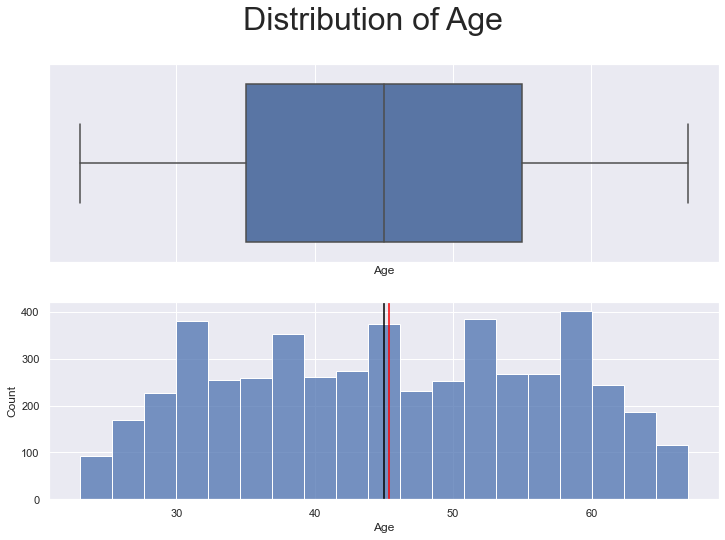

The median of Age is 45.0.
The mean of Age is  45.34
The minimum of Age is 23
The maximum of Age is 67
The standard deviation of Age is  11.46
----------------------------------------------------------


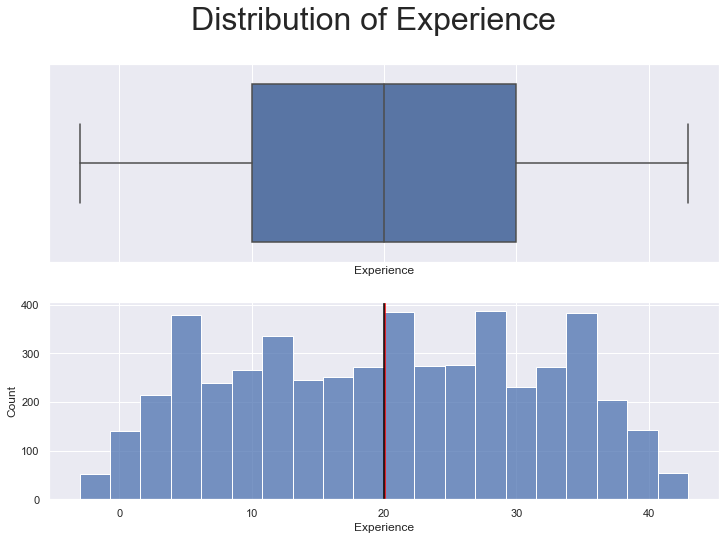

The median of Experience is 20.0.
The mean of Experience is  20.10
The minimum of Experience is -3
The maximum of Experience is 43
The standard deviation of Experience is  11.47
----------------------------------------------------------


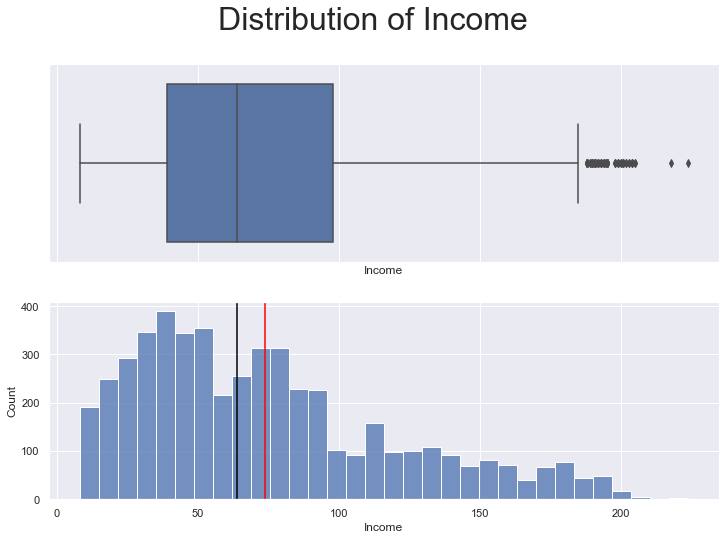

The median of Income is 64.0.
The mean of Income is  73.77
The minimum of Income is 8
The maximum of Income is 224
The standard deviation of Income is  46.03
----------------------------------------------------------


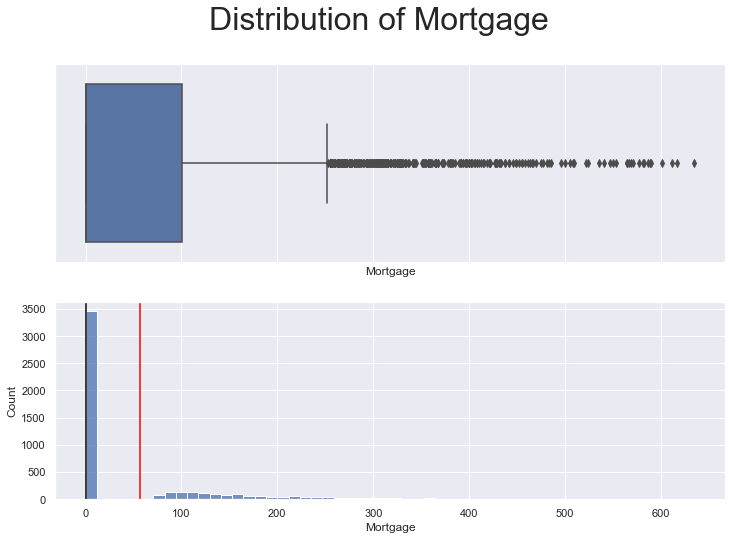

The median of Mortgage is 0.0.
The mean of Mortgage is  56.50
The minimum of Mortgage is 0
The maximum of Mortgage is 635
The standard deviation of Mortgage is  101.71
----------------------------------------------------------


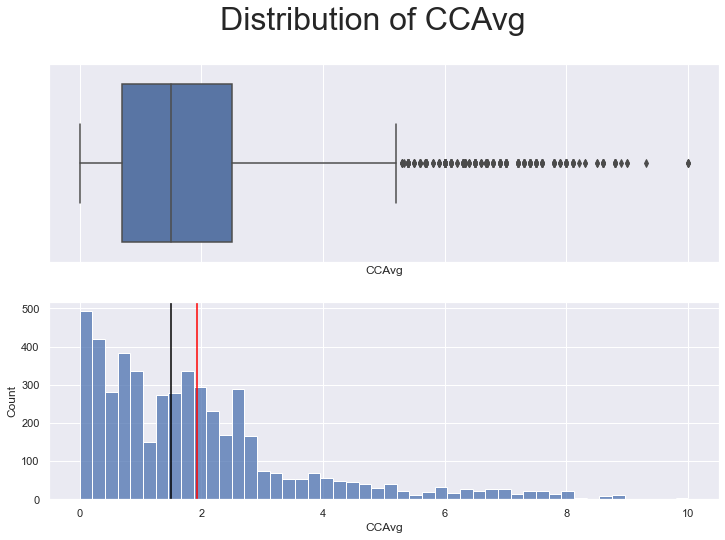

The median of CCAvg is 1.5.
The mean of CCAvg is  1.94
The minimum of CCAvg is 0.0
The maximum of CCAvg is 10.0
The standard deviation of CCAvg is  1.75
----------------------------------------------------------


In [13]:
num_vars = ['Age', 'Experience', 'Income', 'Mortgage', 'CCAvg'] # numeric variables
for column in num_vars:
    box_dist_plot(lmd, column) # to see distributions of the numeric variables

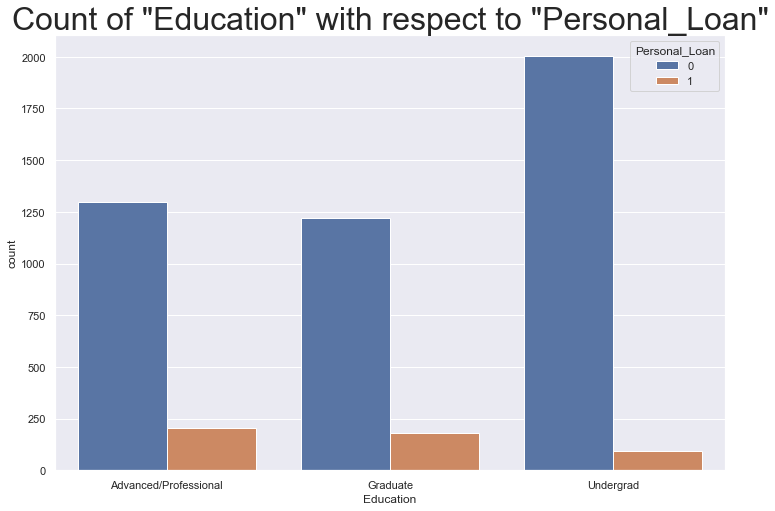

Undergrad                2096
Advanced/Professional    1501
Graduate                 1403
Name: Education, dtype: int64
----------------------------------------------------------


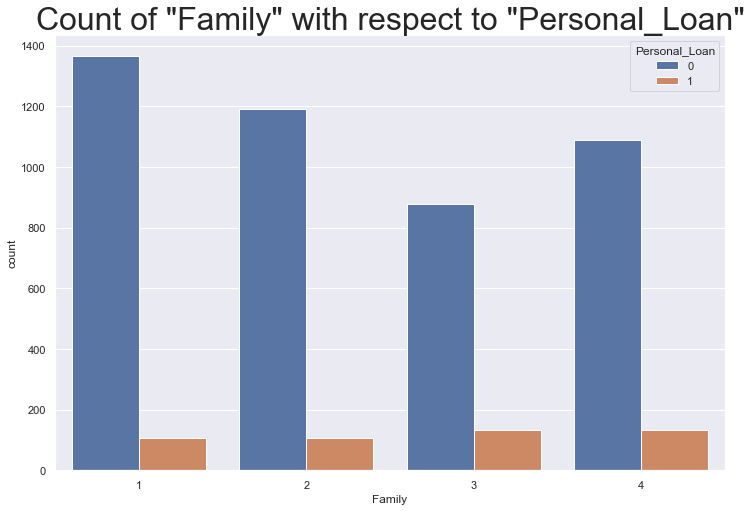

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
----------------------------------------------------------


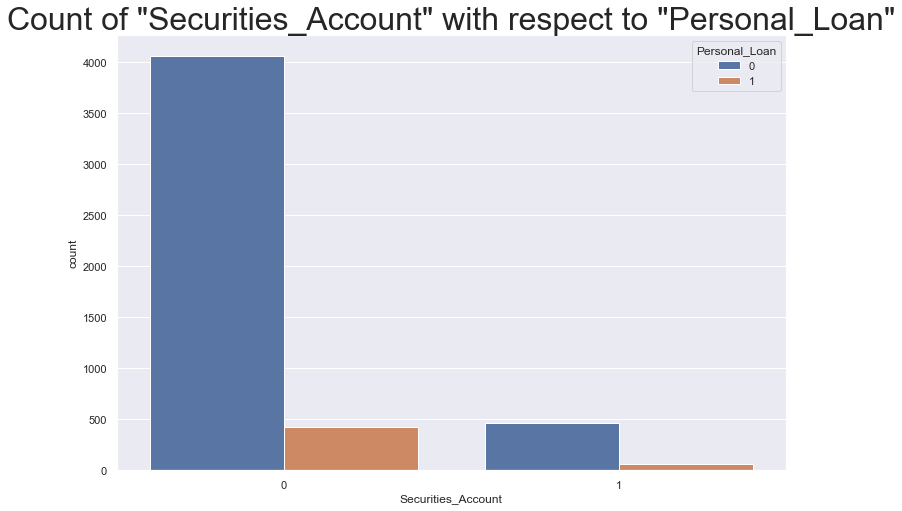

0    4478
1     522
Name: Securities_Account, dtype: int64
----------------------------------------------------------


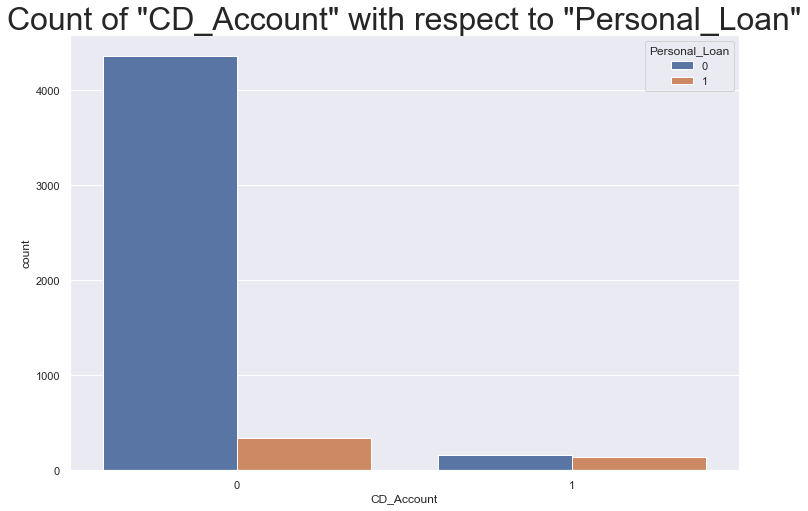

0    4698
1     302
Name: CD_Account, dtype: int64
----------------------------------------------------------


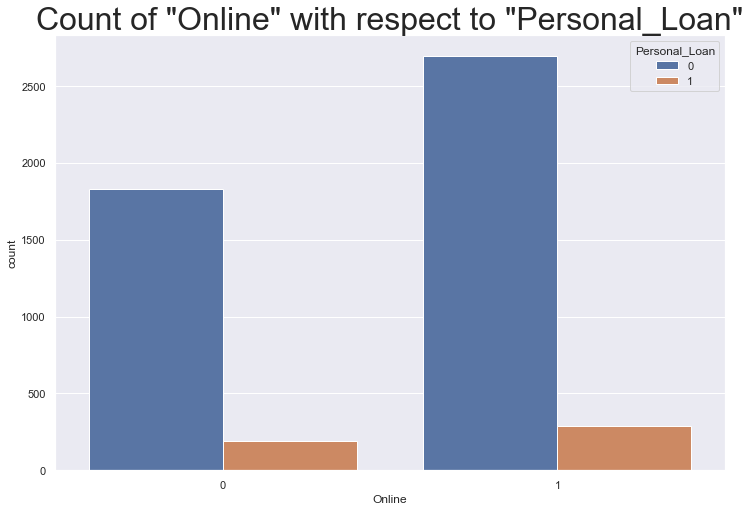

1    2984
0    2016
Name: Online, dtype: int64
----------------------------------------------------------


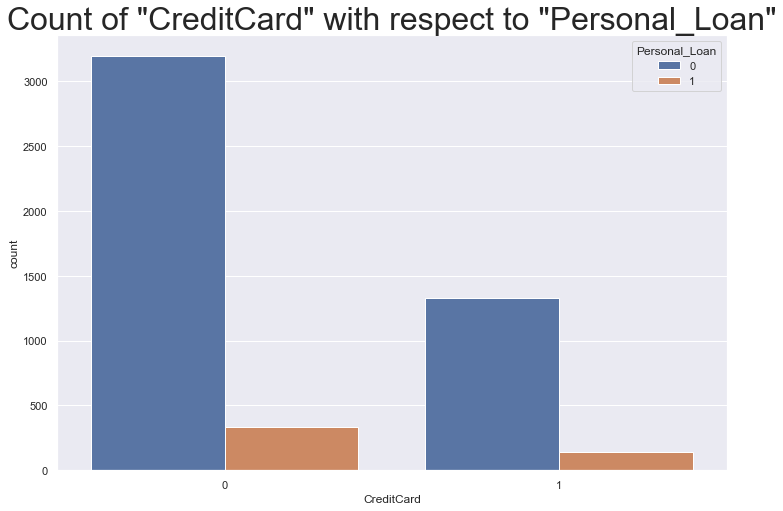

0    3530
1    1470
Name: CreditCard, dtype: int64
----------------------------------------------------------


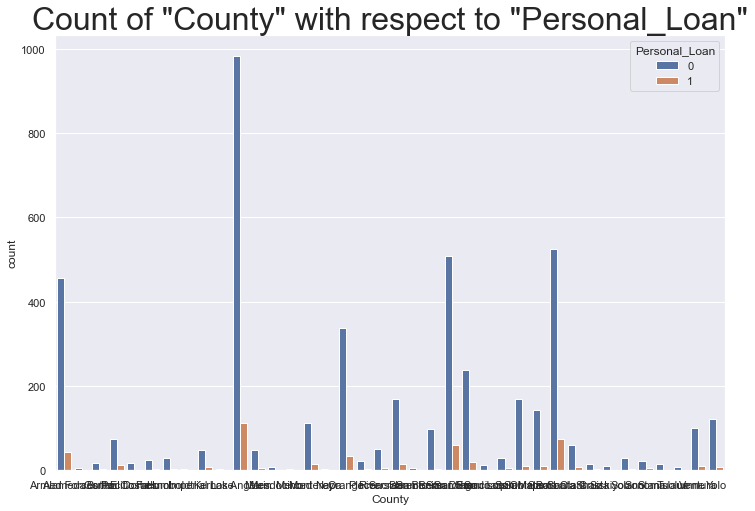

Los Angeles             1094
Santa Clara              597
San Diego                568
Alameda                  500
Orange                   371
San Francisco            257
Sacramento               184
San Mateo                179
Santa Barbara            154
Yolo                     130
Monterey                 128
Ventura                  111
San Bernardino           101
Contra Costa              85
Santa Cruz                68
Riverside                 56
Marin                     54
Kern                      54
Solano                    33
San Luis Obispo           33
Humboldt                  32
Sonoma                    28
Fresno                    26
Placer                    24
Butte                     19
Shasta                    18
El Dorado                 17
Stanislaus                15
San Joaquin               13
Siskiyou                  11
Mendocino                  8
Tuolumne                   7
Armed Forces Pacific       6
San Benito                 5
Lake          

In [14]:
cat_vars = ['Education', 'Family', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County']
    # independent, categorical variables
for column in cat_vars:
    count_plot(lmd, column, 'Personal_Loan') # shows counts with respect to the dependent variable

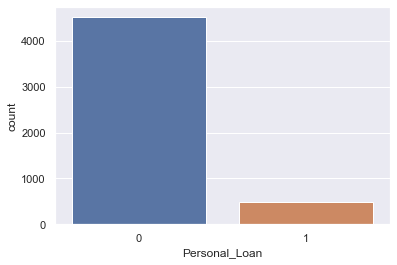

<Figure size 864x576 with 0 Axes>

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [15]:
sns.countplot(x=lmd['Personal_Loan']); # checking the value counts of the dependent variable
plt.figure(figsize=(12,8)) # making the plot larger
plt.show()
lmd['Personal_Loan'].value_counts() # exact counts

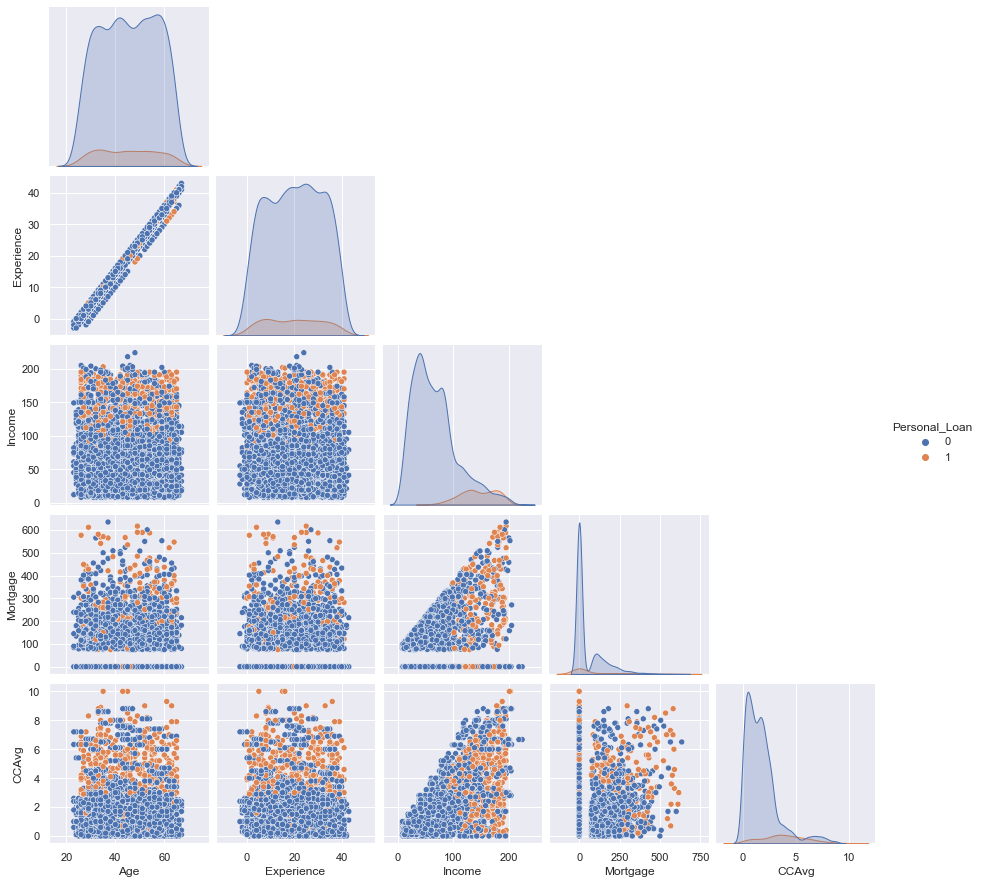

<Figure size 1296x864 with 0 Axes>

In [16]:
sns.pairplot(lmd, vars = num_vars, hue='Personal_Loan', corner=True); 
    # pairplot between pairs of independent variables with respect to the dependent variable
plt.figure(figsize=(18,12)); # larger, more visible plot

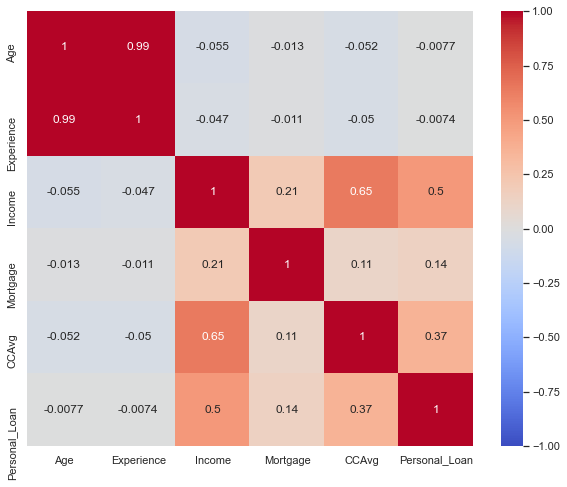

In [17]:
lmd_subset = lmd[['Age', 'Experience', 'Income', 'Mortgage', 'CCAvg', 'Personal_Loan']] 
    # removing categorical variables with numeric values (0, 1) by creating a subset database
plt.figure(figsize=(10,8)) # larger figure
sns.heatmap(lmd_subset.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1); # creates heatmap
plt.show()

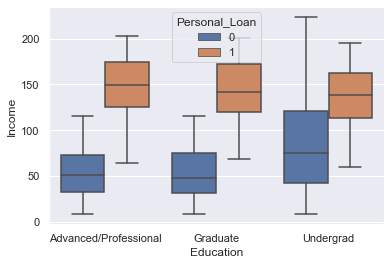

In [18]:
# Looking at the relationship between Income and Education with respect to Personal Loans
sns.boxplot(x=lmd['Education'], y=lmd['Income'], hue=lmd['Personal_Loan']);

## Univariate and Bivariate Analysis Notes:  
**Age and Experience**  
Again, note the erroneous values in the Experience feature.  

The Age and Experience features seem to be normally distributed. They are both highly correlated (.99) so one of them can be removed. Neither Age nor Experience have much correlation (-.007) to the dependent variaable, Personal_Loan.  

**Income**  
The Income feature has a slight right-tail distribution with a few outliers.  

Income has a moderate correlation to the dependent variable (.5). In the distribution plot separating Income by Personal_Loan (pairplot diagonal for Income), it is clearly seen that the distribution of Income for personal loan customers is shifted to the right compared to the distribution of Income for customers without personal loans.  

There is a linear upper bound between Income and CCAvg as well as Income and Mortgage. It appears that Income is a driving factor to have a larger Mortgage or larger credit card spending, CCAvg. While correlation does not prove causation, it is intuitively logical that a high income enables greater amounts of credit. However, higher income does not guarantee higher mortgages or higher credit card spending as much as lower incomes guarantees a lower mortgage and lower credit card spending.  

**Mortgage**  
This feature has a strange distribution as most values are 0, meaning a smaller IQR and more outliers.  

Ignoring the 0 values, the distribution would be slightly skewed to the right.    

It has a low correlation with the dependent variable (.14).  

**CCAvg**  
CCAvg is also skewed to the right with several outliers.  

It has a low to moderate correlation with Personal_Loan (.37) and a moderate to high correlation with Income (.65).  
While the feature could be influential, it will certainly be less influential than Income. With Income's correlation to Personal_Loan of .5 and CCAvg's correlation to Income of .65, we would expect to see .5*(.65) correlation or .325 correlation simply due to its relationship with Income. However, there is still .05 correlation unexplained.  

**Education**  
Undergrads are less likely to have a Personal Loan than Graduates or Professionals.  

Somehow, Undergrads tend to have more Income than Graduates or Professionals. This does not make sense and should probably be investigated to ensure no errors occured in the data collection.  

All Professionals and Graduates above approximately 120k income had personal loans.  

**Family**  
Larger families had personal loans at a slightly higher rate than smaller families, though not be much.  

**Securities_Account, CreditCard, and Online**  
Having a securities account and not having a securities account had approximately the same rate for personal loans, likely indicating this will be a less important variable.  

This is also true for CreditCard and Online.  

**CD_Account**  
While few customers have a certificate of deposit account, almost half who do also have a personal loan. There is a fairly good indicator, though it only applies to a small subset of the sample.  

**County**  
It is hard to determine the rates of personal loans per county. There are likely subsets which produce value and other variables that can be reduced with feature selection.  
<br></br>
<br></br>

## Handling Errors and Outliers

The Experience feature had some erroneous values, but they are no longer an issue as the Experience feature will be removed due to collinearity.  
There are no other noted errors in the dataset and no missing values.  

The Income, Mortgage, and CCAvg features all have outliers.  
Looking at the pairplot, there seems to be some relationship between the outliers for Income/CCAvg and the dependent variable so those outliers will be untouched for now.  
Normalizing the outliers in Mortgage is a possibility for the Logistic Regression model, though I will clip the values from a max of 635 to 450. There are so many outliers as a result of a small IQR so I don't want to clip all of the outliers. Reducing the most extreme outliers will have the most impact if there is any impact to be made.  

In [19]:
# HANDLING ERRORS
del lmd['Experience'] # removed due to collinearity with Income

# OUTLIERS
lmd['Mortgage'] = np.clip(lmd['Mortgage'], 0, 450) # handles outliers greater than 450

lmd_error_analysis = lmd.copy() # saves a copy before one hot encoding for error analysis near the end 

# ONE HOT ENCODING
lmd = pd.get_dummies(lmd, columns = ['County', 'Education'], drop_first = False) 
    # first column is not dropped for decision tree later

lmd.sample(5) # quick view and gives shape

,Age,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,...,County_Siskiyou,County_Solano,County_Sonoma,County_Stanislaus,County_Tuolumne,County_Ventura,County_Yolo,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
1638,32,125,1,0.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2010,61,41,2,1.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1039,41,175,2,1.1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1335,50,180,1,1.7,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3499,49,114,1,0.3,286,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Model Preparation

In [20]:
X = lmd.drop('Personal_Loan', axis=1) # independent variables
y = lmd['Personal_Loan'] # dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7) #splitting data into train and test

print(f'There are {X_train.shape[1]} features.') # prints number of features
print(f'The number of observations in the training set is {X_train.shape[0]}.') # prints observation count for training 
print(f'The number of observations in the test set is {X_test.shape[0]}.\n') # prints observation count for test

# Checking split of dependent variable
print(f'In the training set, {100*y_train.sum()/y_train.shape[0] : .1f}% of customers have personal loans.') # for training
print(f'In the test set, {100*y_test.sum()/y_test.shape[0] : .1f}% of customers have personal loans.') # for test

There are 50 features.
The number of observations in the training set is 3500.
The number of observations in the test set is 1500.

In the training set,  9.8% of customers have personal loans.
In the test set,  9.2% of customers have personal loans.


## Building the Logistic Regression Model

In [21]:
lr_model = LogisticRegression(solver='newton-cg', max_iter=10000) # creating the model, max_iter is increased for algorithm convergence
lr_model = lr_model.fit(X_train, y_train) # training the model

coefficients = pd.DataFrame(np.append(lr_model.coef_, lr_model.intercept_), # database of coefficients including intercept
                           index = X_train.columns.tolist() + ['Intercept'], # adds index
                           columns = ['Coefficients']) # for interpretability

coef_odds = np.exp(coefficients) # calculating odds
coefficients['Odds'] = coef_odds # adding odds to dataframe
coefficients.sort_values(by='Coefficients', ascending=False) # Printing all coefficients for the model, descending

,Coefficients,Odds
CD_Account,3.018079,20.451969
Education_Advanced/Professional,1.245393,3.474298
Education_Graduate,1.158496,3.185139
Family,0.694586,2.002879
County_Riverside,0.654086,1.923383
County_Solano,0.588419,1.801139
County_Butte,0.588055,1.800483
County_San Diego,0.535529,1.708353
County_Santa Clara,0.526227,1.692535
County_Ventura,0.500843,1.650111


#### Notes on Coefficients:
Coefficients (log odds) are difficult to interpret so the odds are calculated to help with interpretation. Instead of 0 being the neutral value, 1 is the neutral value for odds (as e^0 = 1). The closer the odds are to 1, the less effect it has on the likelihood of success or failure. For example, County_Tuolumne decreased the chance of success (a personal loan) by a factor of 0.998610 which barely changes the likelihood. In contrast, CD_Account increased the chance of a personal loan by a factor of 20.45.  

Most log odds (coefficients) are multiplied by 0 or 1.  
Only Age, Income, Family, CCAvg, and Mortgage are multiplied by other values. 
- **Age** (range: 23 to 67), Log Odds: 0.009318
    - Possible Range of Log Odds: **.2143 to .6243**
- **Income** (range: 8 to 224), Log Odds: 0.055802	
    - Possible Range of Log Odds: **.4464 to 12.4996**   
- **Family** (range: 1 to 4), Log Odds: 0.694586	
    - Possible Range of Log Odds: **.6946 to 2.7783**  
- **CCAvg** (range: 0 to 10), Log Odds: 0.181925	
    - Possible Range of Log Odds: **0 to 1.8193**   
- **Mortgage** (range: 0 to 450), Log Odds: 0.001080
    - Possible Range of Log Odds: **0 to .486**
    
Using the cofficient ranges for the numeric variables, we can better understand what the important variables are.  
Income, CD_Account, Family, and Education (specifically not being an Undergrad) have the largest impacts.  

Using the odds, we can understand just how much the independent variable impacts.  
For example, CD_Account is 10 times as impactful as being from Riverside County.

## Model Evaluation Metrics:

Prediction Error Types:  
1) The model predicts that the person will buy a personal loan, but they will not (loss of resources).  
2) The model predicts that the person will not buy a personal loan, but they would (loss of opportunity).  

The purpose of this model is to help the marketing department identify the potential customers who have a higher probability of purchasing the loan. If we don't market to a potential customer who would buy a personal loan, then there won't be expansion in personal loans which is the purpose of the model. There will be profits associated with gaining more personal loan customers so the loss of resources can be offset by the gain of opportunity.   
Therefore, we need to minimize the type II error. This can be accomplished by maximizing Recall while preserving as much Precision as we can to avoid senseless loss of resources.  

In [22]:
def cm_scoring_eval(model, X, y, threshold=.5):
    """This function returns a confusion matrix and the scores (accuracy, recall, precision, specificity, and f1).
    The default value for threshold is 0.5"""
    
    # Confusion Matrix
    predictions = np.round(model.predict_proba(X)[:,1] > threshold) 
        # predicts the classes based on probabilities above a threshold
    cm_fig, cm_axes = plt.subplots() # necessary to create an ojbect of Axes class for labelling
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel() # confusion matrix numbers, gives more control over formatting
    total = tn + fp + fn + tp # total number of observations, used for percentages
    labels = np.array([["{0:0.0f}".format(tp) + "\nTrue Positive" + "\n{0:.2%}".format(tp/total),
                        "{0:0.0f}".format(fn) + "\nFalse Negative" + "\n{0:.2%}".format(fn/total)], 
                       ["{0:0.0f}".format(fp) + "\nFalse Positive" + "\n{0:.2%}".format(fp/total),
                        "{0:0.0f}".format(tn) + "\nTrue Negative" + "\n{0:.2%}".format(tn/total)]])
        # Labels is used to format the cells of the heatmap to include the values, classifications, and overall percentages
    sns.heatmap([[tp,fn],[fp,tn]], annot=labels, fmt = '', cmap="seismic") # heatmap of confusion matrix
    cm_axes.set_xlabel('PREDICTED') # main X-axis label
    cm_axes.set_ylabel('ACTUAL') # main Y-axis label
    cm_axes.xaxis.set_ticklabels(['Yes', 'No']) # labels for each box on X-axis
    cm_axes.yaxis.set_ticklabels(['Yes', 'No']) # labels for each box on Y-axis
    plt.show() # to show heatmap before classification report
    
    # Scoring, based on values in the confusion matrix
    scoring = {"Accuracy" : ['{0:0.2%}'.format((tn+tp)/(tn+tp+fp+fn))], # calculates and formats accuracy
               "Recall" : ['{0:0.2f}'.format(tp/(tp+fn))], # calculates and formats recall
               "Specificity" : ['{0:0.2f}'.format(tn/(tn+fp))], # calculates and formats specificity
               "Precision" : ['{0:0.2f}'.format(tp/(tp+fp))],  # calculates and formats precision
               "F1 Score":['{0:0.2f}'.format((2*tp/(tp+fp)*tp/(tp+fn))/(tp/(tp+fp)+tp/(tp+fn)))]} # calculates and formats f1
    scoring_db = pd.DataFrame(scoring) # creates database for scores
    print(scoring_db.T) # shows the scores below the confusion matrix

For the training set:


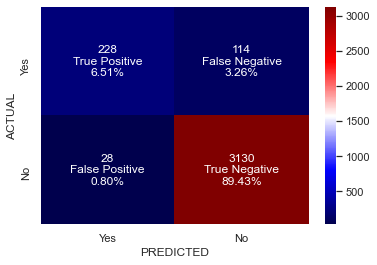

                  0
Accuracy     95.94%
Recall         0.67
Specificity    0.99
Precision      0.89
F1 Score       0.76

-----------------------------------------------------------
For the test set:


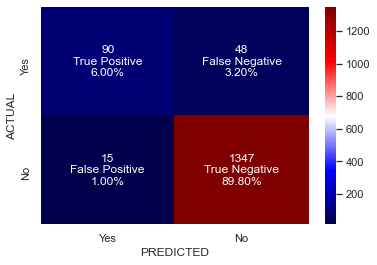

                  0
Accuracy     95.80%
Recall         0.65
Specificity    0.99
Precision      0.86
F1 Score       0.74


In [23]:
print('For the training set:')
cm_scoring_eval(lr_model, X_train, y_train) # evaluating model for training data
print('\n-----------------------------------------------------------') #spacing the results
print('For the test set:')
cm_scoring_eval(lr_model, X_test, y_test) # evaluating model for test data

## Model Performance
The training data has similar accuracy and specificity to the test data, but a slightly higher recall and precision score.  
This indicates that the model is slightly overfit.  

We want to maximize the Recall to avoid a loss of opportunity as much as possible.  
With a Recall of .64 and a Precision of .85 on the test data, this model is currently insufficient.  
However, we can improve the model by changing the threshold from .5 to a more optimal number.

In [24]:
def threshold_calc(model, X, y):
    """This function graphs the ROC-AUC curve and calculates the optimal threshold with various methods."""
    # ROC curve is useful for binary classification so it is used here
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1]) # data for the ROC graph
    roc_auc_scoring = roc_auc_score(y, model.predict_proba(X)[:,1]) # area under the ROC graphed curve
    # Plotting Details
    plt.figure(figsize=(10,6)) # somewhat larger plot
    plt.title('Receiver Operating Characteristic Graph', fontdict={'fontsize':18}) # enlarged title
    plt.xlabel('False Positive Rates', fontdict={'fontsize':16}) # medium font x-axis label
    plt.ylabel('True Positive Rates', fontdict={'fontsize':16})  # medium font y-axis label
    plt.xlim([0, 1]) # length of x-axis
    plt.ylim([0, 1.01]) # length of y-axis 
    plt.plot([0,1],[0,1], 'r--') # plots the random classifier
    plt.plot(fpr, tpr, label=f'Area under the curve: {roc_auc_scoring : 0.2f}') # plots the model classifier
    plt.legend(loc=4, fontsize='large') # lower right location, using location codes
    plt.show() # shows the plot
    
    # OPTIMAL THRESHOLD TO MAXIMIZE RECALL
        # Method 1: Finding the optimal threshold value using TPR - FPR from the ROC-AUC data
    best_thresh = np.argmax(tpr - fpr) # finds index of largest TPR-FPR
    optimal_thresh = thresholds[best_thresh] # uses the index to get the threshold
    print(f'The optimal threshold using the ROC-AUC is {optimal_thresh}') # prints the threshold
        # Method 2: Finding the optimal threshold value using the precision-recall curve
    precisions, recalls, thresholds=precision_recall_curve(y,model.predict_proba(X)[:,1]) #recall, precision for all thresholds
    plt.figure(figsize=(10,6))
    plt.title('Precision-Recall Curve', fontdict={'fontsize':18}) # enlarged title
    plt.xlabel('Threshold', fontdict={'fontsize':16}) # medium font x-axis label
    plt.xlim([0, 1]) # length of x-axis
    plt.ylim([0, 1.01]) # length of y-axis
    plt.plot(thresholds, precisions[:-1], 'r-.', label='Precision') # plots the precision levels for each threshold
    plt.plot(thresholds, recalls[:-1], 'b-', label='Recall') # plots the recall levels for each threshold
    plt.minorticks_on() # enables minor ticks, easier to find specific thresholds
    plt.grid(which='minor', color='white', linestyle='--') # matches style of major ticks except change in linestyle
    plt.show() # shows the plot

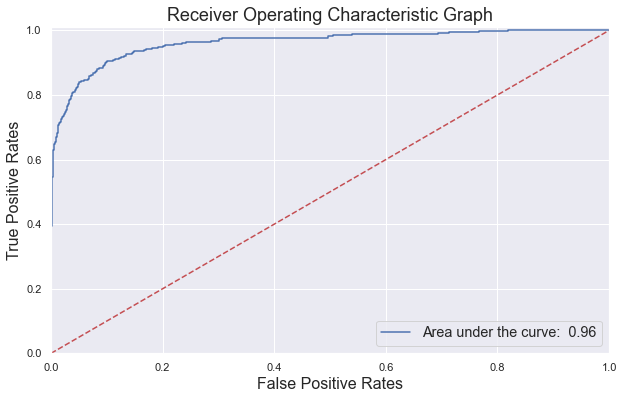

The optimal threshold using the ROC-AUC is 0.10445139150988805


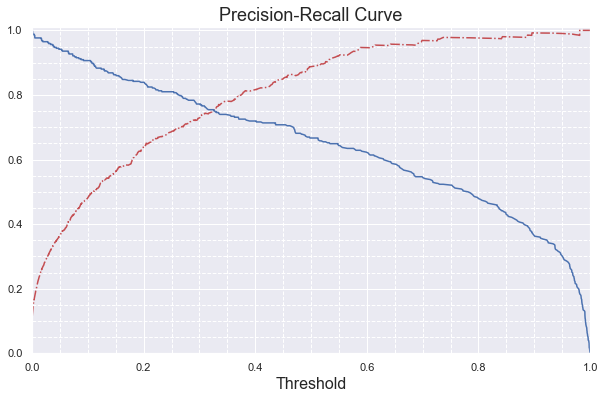

In [25]:
threshold_calc(lr_model, X_train, y_train) # creating ROC-AUC and precision-recall curve for the logistic regression model

### Threshold Notes:
We will evaluate the model at two more thresholds to maximize recall primarily and precision secondarily.  

The first threshold will be based on the ROC-AUC optimal threshold results: a threshold of .103  
The second threshold will be based on the precision-recall curve graph: a threshold of .155  

For the training set using threshold of .103:


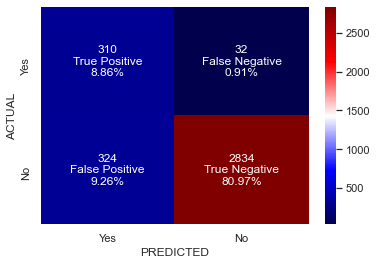

                  0
Accuracy     89.83%
Recall         0.91
Specificity    0.90
Precision      0.49
F1 Score       0.64

-----------------------------------------------------------
For the test set using threshold of .103:


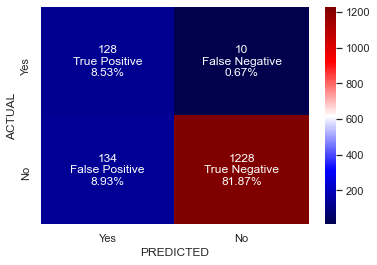

                  0
Accuracy     90.40%
Recall         0.93
Specificity    0.90
Precision      0.49
F1 Score       0.64


In [26]:
print('For the training set using threshold of .103:')
cm_scoring_eval(lr_model, X_train, y_train, threshold=.103) # evaluating model for training data
print('\n-----------------------------------------------------------') #spacing the results
print('For the test set using threshold of .103:')
cm_scoring_eval(lr_model, X_test, y_test, threshold=.103) # evaluating model for test data

For the training set using threshold of .155:


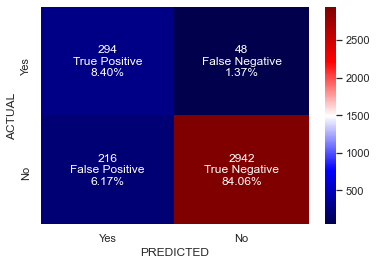

                  0
Accuracy     92.46%
Recall         0.86
Specificity    0.93
Precision      0.58
F1 Score       0.69

-----------------------------------------------------------
For the test set using threshold of .155:


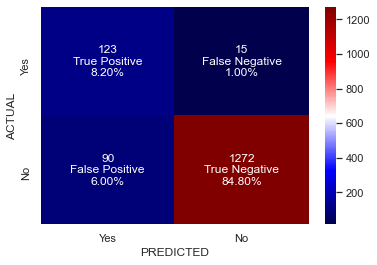

                  0
Accuracy     93.00%
Recall         0.89
Specificity    0.93
Precision      0.58
F1 Score       0.70


In [27]:
print('For the training set using threshold of .155:')
cm_scoring_eval(lr_model, X_train, y_train, threshold=.155) # evaluating model for training data
print('\n-----------------------------------------------------------') #spacing the results
print('For the test set using threshold of .155:')
cm_scoring_eval(lr_model, X_test, y_test, threshold=.155) # evaluating model for test data

### THRESHOLD NOTES:
##### **SCORE SUMMARY**  
A **.5 threshold** produces (training scores/test scores):
- Accuracy (95.94% / 95.80%)
- Recall (.67 / .65)
- Specificity (.99 / .99)
- Precision (.89 / .86)
- F1 Score (.76 / .74)

A **.103 threshold** produces:
- Accuracy (89.83% / 90.40%)
- Recall (.91 / .93)
- Specificity (.90 / .90)
- Precision (.49 / .49)
- F1 Score (.64 / .64)

A **.155 threshold** produces:
- Accuracy (92.46% / 93.00%)
- Recall (.86 / .89)
- Specificity (.93 / .93)
- Precision (.58 / .58)
- F1 Score (.69 / .70)

##### **OBSERVATIONS**
Both the .103 threshold and the .155 threshold models are better than the .5 threshold model for this problem.  
.155 threshold model gains .09 Precision and losses .04 Recall compared to the .103 threshold.  

In order to determine the true ideal threshold, we must be more precise in the costs related to the loss in resources and the loss in opportunity. In absence of the information showing true costs, we don't know how to optimally balance the cost functions beyond that recall is more important than precision.

The .103 threshold and the .155 threshold models are equally useful without further domain knowledge.  

## Building the Decision Tree Model

Scoring using Training Data for the Full Decision Tree Model:


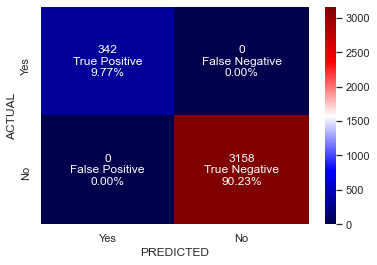

                   0
Accuracy     100.00%
Recall          1.00
Specificity     1.00
Precision       1.00
F1 Score        1.00

-------------------------------------------------
Scoring using Test Data for the Full Decision Tree Model:


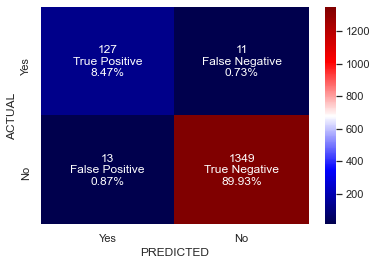

                  0
Accuracy     98.40%
Recall         0.92
Specificity    0.99
Precision      0.91
F1 Score       0.91


In [28]:
decision_tree_basic = DecisionTreeClassifier(criterion = 'gini', random_state=7) # full tree model with gini criterion
decision_tree_basic.fit(X_train, y_train) # fitting the model

print('Scoring using Training Data for the Full Decision Tree Model:')
cm_scoring_eval(decision_tree_basic, X_train, y_train)
print('\n-------------------------------------------------')
print('Scoring using Test Data for the Full Decision Tree Model:')
cm_scoring_eval(decision_tree_basic, X_test, y_test)

### Model Performance

Naturally, a decision tree will overfit the training data without any pre-pruning hyperparameters.  
Looking at the test data performance, the basic decision tree model outperforms the logistic regression model.  
The recall is just as good as the highest recall in the logistic regression model without sacrificing the precision.  

Despite this good performance, the model needs to reduce overfitting. We will create additional models using pre-pruning, GridSearchCV, and cost complexity pruning. This will reduce the complexity of the model while maintaining much of the performance.   

In [29]:
def tree_visualization(model_tree, features):
    """A function that displays the tree, shows the rules with weights, determines the importance of each feature, and 
    graphs the importances."""
    # Tree Plot
    feature_list = list(features.columns) # gets names of features
    plt.figure(figsize=(20,25)) # enlarges figure
    answer = plot_tree(model_tree, feature_names=feature_list, fontsize=10, filled=True) # saves tree plot in answer
    for o in answer: # Loop used in Online Shoppers Case Study to solve the problem the missing arrows
        arrow = o.arrow_patch # fixes arrow bug
        if arrow is not None: # changes settings for arrow if there is an arrow
            arrow.set_edgecolor('black') # arrow settings: edge color is black
            arrow.set_linewidth(1) # arrow settings: line width is 1
    plt.show() # shows plot
    
    # Exported Tree Text
    print(export_text(model_tree, feature_names = feature_list, show_weights=True)) # prints the text version of the tree
    
    # Importances
    importances = pd.DataFrame(model_tree.feature_importances_, index=features.columns, columns=['Importance'] # dataframe
                              ).sort_values(by='Importance') # sorted by Importance
    print(importances) # prints dataframe
    plt.figure(figsize=(12,12)) # enlarges the graph 
    plt.barh(y=importances.index.tolist(), width=importances['Importance']) # horizontal bar chart of Importances
    plt.show() # shows the plot

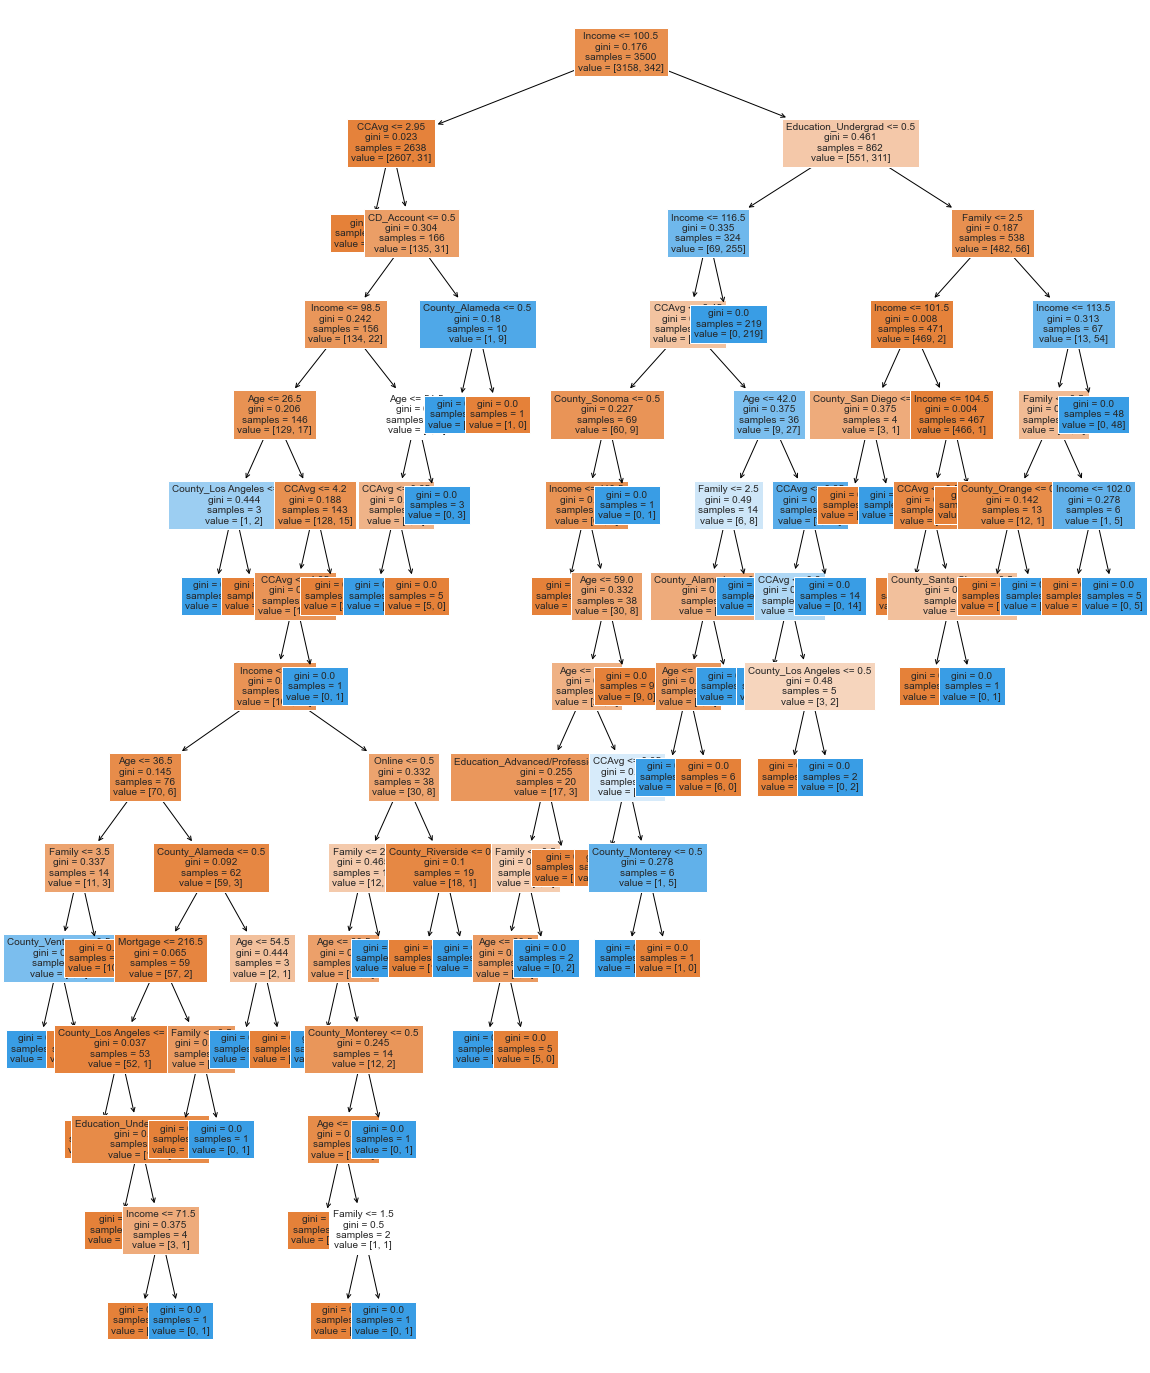

|--- Income <= 100.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2472.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 98.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- County_Los Angeles <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |--- County_Los Angeles >  0.50
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |   |--- CCAvg <= 4.05
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- County_Ventura <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- County_Ventura >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] clas

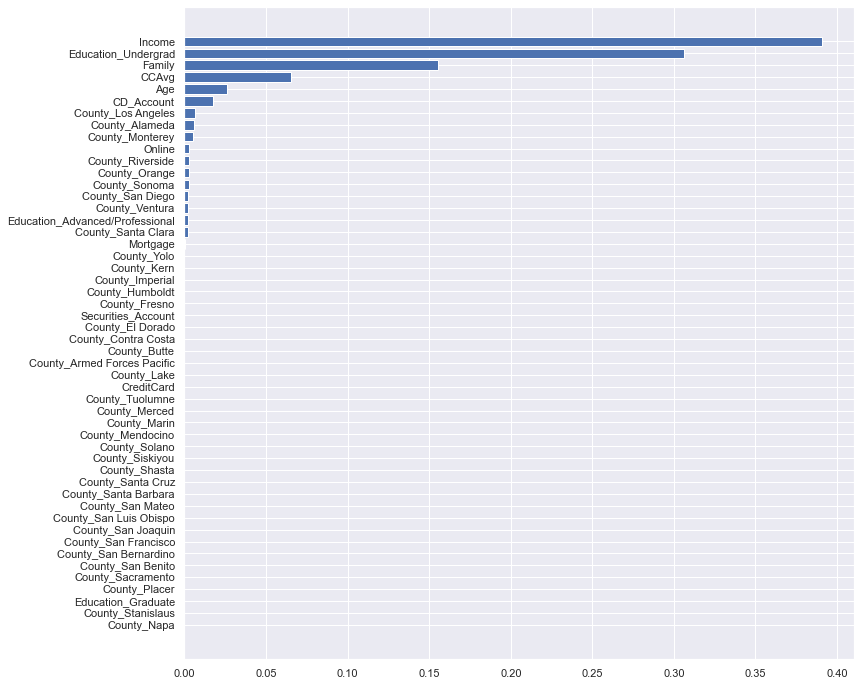

In [30]:
tree_visualization(decision_tree_basic, X_train) # visualization for the decision_tree_basic model

### Visualization Notes:

Most of the variables have no importance so the model can be dimensionally reduced.  
Income, Education_Undergrad, and Family are the most important features. This is also confirmed by the coefficients in the Logistic Regression model.  
This particular tree needs to be simplified so those will be our next models.  

## Second Decision Tree Model: Pre-pruning with GridSearchCV

In [31]:
decision_tree_preprune = DecisionTreeClassifier(random_state=7) 
    # creating model with hyperparameters which can be tuned by GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'], # all possible options
              'splitter' : ['best', 'random'], # all possible options
              'max_depth' : [3, 5, 8, 10, 12, None], # original full tree model stopped at a depth of 15
              'min_samples_split' : [.05, .1, .25, .4, .5], # fractions become percentage of samples needed for a split
              'class_weight':[{0:.90, 1:.1}, {0:.8, 1:.2}, {0:.2, 1:.8}, {0:.1, 1:.9}, {0:.4, 1:.6}, {0:.6, 1:.4}, 'balanced'], 
                    # I wasn't sure how to assign the class weights so I included many possibilities
              'min_impurity_decrease' : [.00001, .0001, .001, .01]} # checking orders of magnitude

score = make_scorer(recall_score) 
    # method of scoring, recall is used exclusively because I could not get both recall and precision included in the score_func
preprune_grid = GridSearchCV(decision_tree_preprune, parameters, scoring=score) # searching a grid of hyperparamters
preprune_grid = preprune_grid.fit(X_train, y_train) # fitted to data

decision_tree_preprune = preprune_grid.best_estimator_ # setting the model to the best estimates
decision_tree_preprune.fit(X_train, y_train) # fitting the model to the data

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=3,
                       min_impurity_decrease=1e-05, min_samples_split=0.4,
                       random_state=7)

Scoring using Training Data for the Prepruned Decision Tree Model:


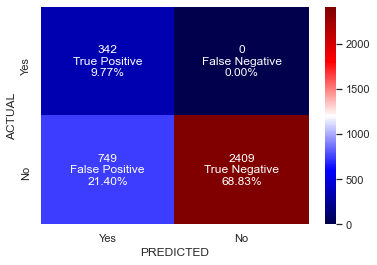

                  0
Accuracy     78.60%
Recall         1.00
Specificity    0.76
Precision      0.31
F1 Score       0.48

-------------------------------------------------
Scoring using Test Data for the Prepruned Decision Tree Model:


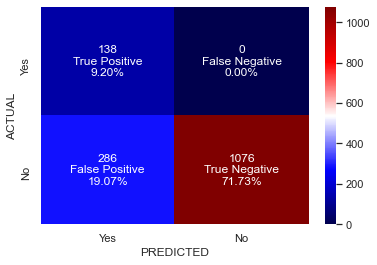

                  0
Accuracy     80.93%
Recall         1.00
Specificity    0.79
Precision      0.33
F1 Score       0.49

-------------------------------------------------


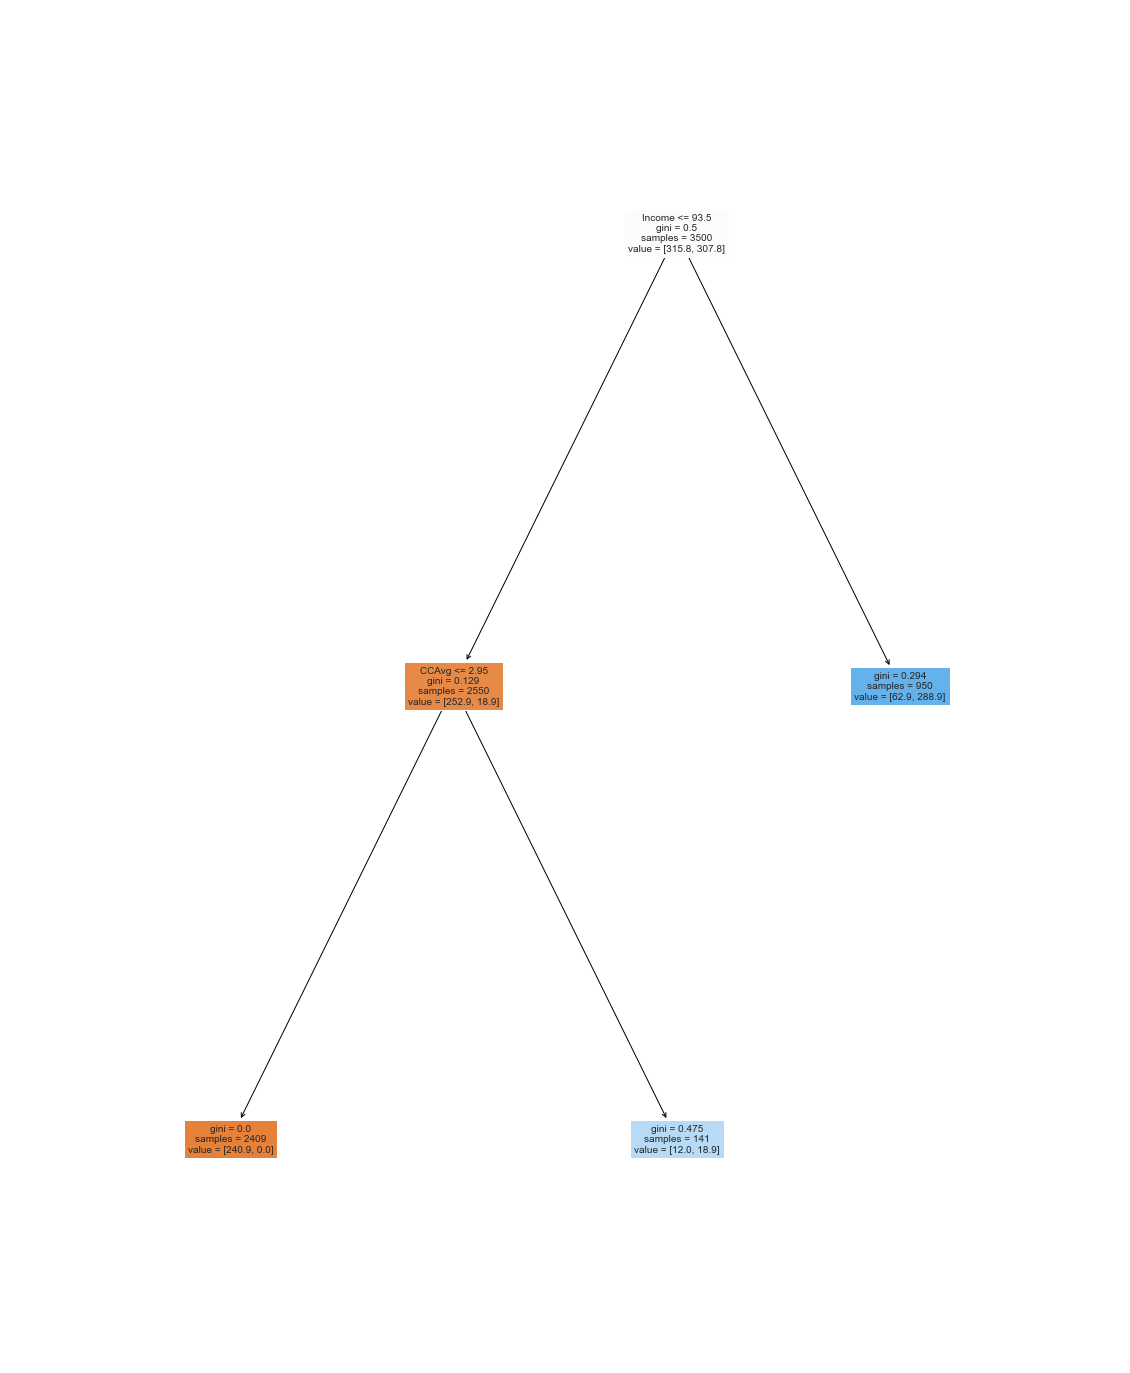

|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [240.90, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [12.00, 18.90] class: 1
|--- Income >  93.50
|   |--- weights: [62.90, 288.90] class: 1

                                 Importance
Age                                0.000000
County_Riverside                   0.000000
County_Sacramento                  0.000000
County_San Benito                  0.000000
County_San Bernardino              0.000000
County_San Diego                   0.000000
County_San Francisco               0.000000
County_San Joaquin                 0.000000
County_San Luis Obispo             0.000000
County_San Mateo                   0.000000
County_Santa Barbara               0.000000
County_Santa Clara                 0.000000
County_Santa Cruz                  0.000000
County_Shasta                      0.000000
County_Siskiyou                    0.000000
County_Solano                      0.000000
County_Sonoma               

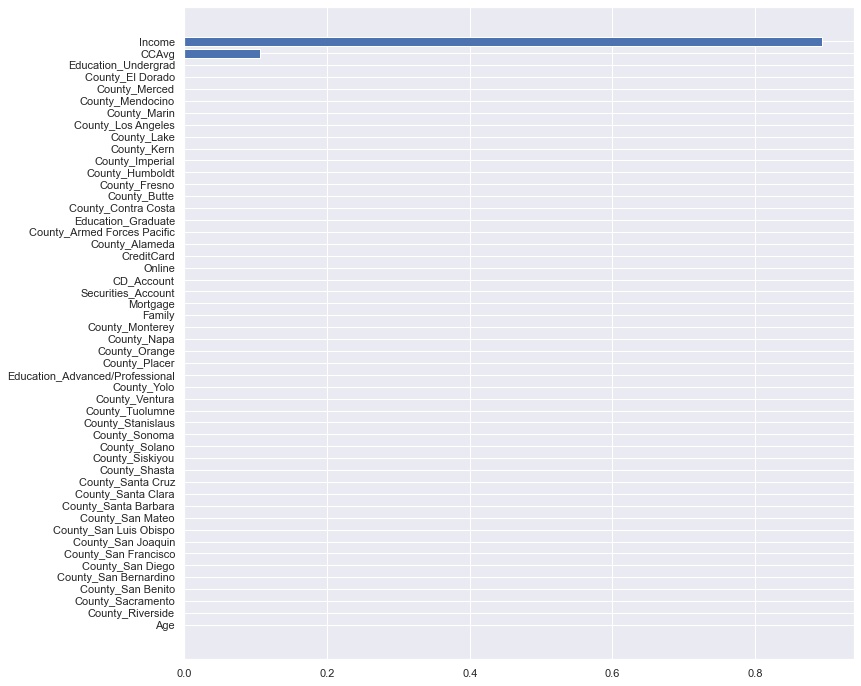

In [32]:
print('Scoring using Training Data for the Prepruned Decision Tree Model:')
cm_scoring_eval(decision_tree_preprune, X_train, y_train)
print('\n-------------------------------------------------')
print('Scoring using Test Data for the Prepruned Decision Tree Model:')
cm_scoring_eval(decision_tree_preprune, X_test, y_test)
print('\n-------------------------------------------------')
tree_visualization(decision_tree_preprune, X_train)

## Prepruning Model Assessment
The model had a max depth of 3, making it far simpler than the previous model. It also allowed for smaller impurity changes with min_impurity_decrease = .00001 and min_samples_split = .4 (40%). The class weight chosen was a .1 weight for no personal loan and a .9 weight for a personal loan. This is in the context of 10% of customers having a personal loan and 90% of customers not having a personal loan.   

It only uses two features (Income and CCAvg) which makes it easy to interpret and evaluate. If Income is greater than 93.5 or if CCAvg is greater than 2.95, then the model predicts that the customer will buy a personal loan. In fact, this is so simple than it could be implemented in the field manually which is a major advantage.  

The confusion matrix metrics (train / test) were:
- Accuracy (78.60% / 80.93%)
- Recall (1.00 / 1.00)
- Specificity (0.76 / 0.79)
- Precision (0.31 / 0.33)
- F1 Score (0.48 / 0.49)

Our scoring only considered Recall with no regard to Precision as opposed to our logistic regression model so the Recall is 100% while Precision dropped to about 32%. This could still be a valid model if the cost associated with the loss of opportunity far outweighed the cost associated with the loss of resources.   

# Third Decision Tree Model: Cost Complexity Pruning

In [33]:
decision_tree_ccp = DecisionTreeClassifier(criterion='gini', class_weight={0: 0.1, 1: 0.9}, random_state=7) # new model
ccp_path = decision_tree_ccp.cost_complexity_pruning_path(X_train, y_train) # getting the paths of cost complexities
ccp_alphas, ccp_impurities = ccp_path.ccp_alphas, ccp_path.impurities # assigning the alpha values and impurities for all paths
pd.DataFrame(ccp_path) # viewing the alphas and the impurities

,ccp_alphas,impurities
0,0.000000e+00,-1.445284e-16
1,1.780345e-19,-1.443504e-16
2,1.780345e-19,-1.441723e-16
3,3.738724e-19,-1.437985e-16
4,3.738724e-19,-1.434246e-16
5,7.121379e-19,-1.427124e-16
6,1.121617e-18,-1.415908e-16
7,1.281848e-18,-1.403090e-16
8,1.281848e-18,-1.390271e-16
9,3.525083e-18,-1.355020e-16


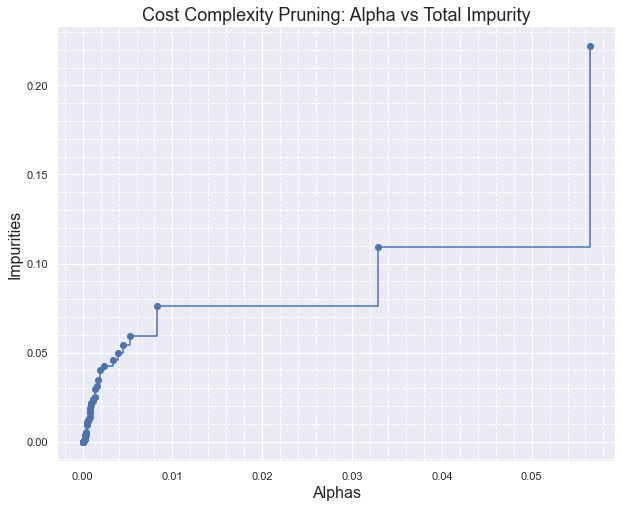

In [34]:
# PLOT THE ALPHAS VS. IMPURITIES
plt.figure(figsize=(10,8)) # slightly enlarged plot
plt.plot(ccp_alphas[:-1], ccp_impurities[:-1], marker='o', drawstyle='steps-post') 
    # alphas on the x-axis, impurities on the y-axis, each point marked with a circle, drawn with steps
plt.title('Cost Complexity Pruning: Alpha vs Total Impurity', fontdict={'fontsize':18}) # title
plt.xlabel('Alphas', fontdict={'fontsize':16}) # label for x-axis
plt.ylabel('Impurities', fontdict={'fontsize':16}) # label for y-axis
plt.minorticks_on() # enables minor ticks, easier to see specific values
plt.grid(which='minor', color='white', linestyle='--') # matches style of major ticks except change in linestyle
plt.show() # shows plot

In [35]:
dtree_ccp_models = [] # list of all possible trees
for ccp_alpha in ccp_alphas: # all alpha values from cost complexity pruning path
    dtree_ccp_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, class_weight={0: 0.1, 1: 0.9}, random_state=7)
        # creates a new Decision Tree model for each value of alpha 
    dtree_ccp_model.fit(X_train, y_train) # fitted to training data
    dtree_ccp_models.append(dtree_ccp_model) # all models are added to the list
    
print(f'Full tree: {dtree_ccp_models[0].tree_.node_count} nodes, alpha is {ccp_alphas[0] : 0.4f}, ' + 
      f'impurity is {ccp_impurities[0] : 0.4f}') # full tree details
print(f'Root tree: {dtree_ccp_models[-1].tree_.node_count} node, alpha is {ccp_alphas[-1] : 0.4f}, ' +
      f'impurity is {ccp_impurities[-1] : 0.4f}') # root tree details

Full tree: 163 nodes, alpha is  0.0000, impurity is -0.0000
Root tree: 1 node, alpha is  0.2779, impurity is  0.4999


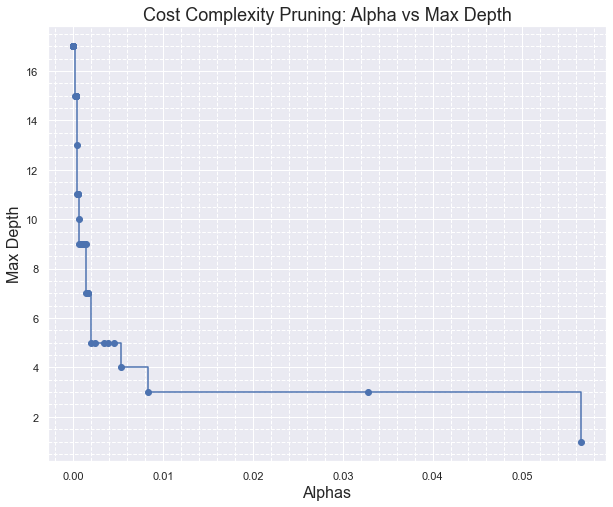

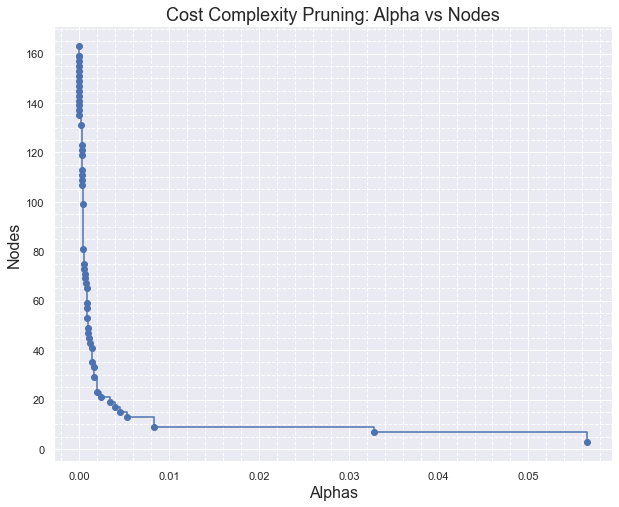

In [36]:
# GATHERING INFORMATION FROM ALL OF THE MODELS
nodes = [] # empty list for nodes
depths = [] # empty list for depths
for i in np.arange(len(dtree_ccp_models)):
    depths.append(dtree_ccp_models[i].tree_.max_depth) # adds max depth of model to list 
    nodes.append(dtree_ccp_models[i].tree_.node_count) # adds node count of model to list

# ALPHA VS MAX DEPTH PLOT
plt.figure(figsize=(10,8)) # slightly enlarged plot
plt.plot(ccp_alphas[:-1], depths[:-1], marker='o', drawstyle='steps-post') 
    # alphas on the x-axis, depths on the y-axis, each point marked with a circle, drawn with steps
plt.title('Cost Complexity Pruning: Alpha vs Max Depth', fontdict={'fontsize':18}) # title
plt.xlabel('Alphas', fontdict={'fontsize':16}) # label for x-axis
plt.ylabel('Max Depth', fontdict={'fontsize':16}) # label for y-axis
plt.minorticks_on() # enables minor ticks, easier to see specific values
plt.grid(which='minor', color='white', linestyle='--') # matches style of major ticks except change in linestyle
plt.show() # shows plot

# ALPHA VS NODES PLOT
plt.figure(figsize=(10,8)) # slightly enlarged plot
plt.plot(ccp_alphas[:-1], nodes[:-1], marker='o', drawstyle='steps-post')
    # alphas on the x-axis, nodes on the y-axis, each point marked with a circle, drawn with steps
plt.title('Cost Complexity Pruning: Alpha vs Nodes', fontdict={'fontsize':18}) # title
plt.xlabel('Alphas', fontdict={'fontsize':16}) # label for x-axis
plt.ylabel('Nodes', fontdict={'fontsize':16}) # label for y-axis
plt.minorticks_on() # enables minor ticks, easier to see specific values
plt.grid(which='minor', color='white', linestyle='--') # matches style of major ticks except change in linestyle
plt.show() # shows plot

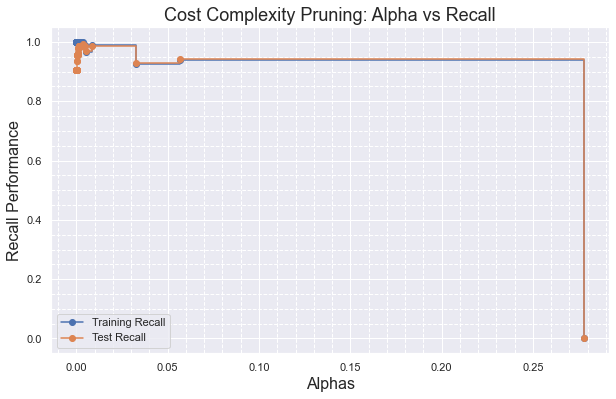

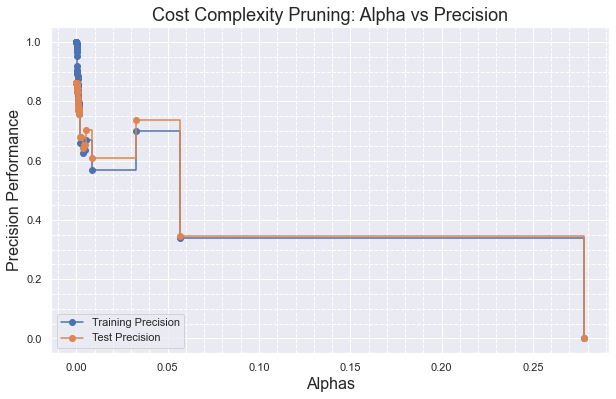

In [37]:
# PERFORMANCE OF ALL MODELS
recall_train = [] # empty list for the recall of the training data
recall_test = [] # empty list for the recall of the test data
precision_train = [] # empty list for the precision of the training data
precision_test = [] # empty list for the precision of the test data
for model in dtree_ccp_models: # all models in cost complexity pruning path
    # TRAINING DATA
    prediction_train = model.predict(X_train) # predicts the dependent variable
    recall_train.append(recall_score(y_train, prediction_train)) # adds recall score to a list
    precision_train.append(precision_score(y_train, prediction_train, zero_division=0)) # adds precision score to a list
        # zero_division will set the precision to 0 if there is division by 0
    # TEST DATA
    prediction_test = model.predict(X_test) # predicts the dependent variable
    recall_test.append(recall_score(y_test, prediction_test)) # adds recall score to a list
    precision_test.append(precision_score(y_test, prediction_test, zero_division=0)) # adds precision score to a list
        # zero_division will set the precision to 0 if there is division by 0
    
# ALPHA VS RECALL PLOT
plt.figure(figsize=(10,6)) # enlarged plot
plt.plot(ccp_alphas, recall_train, label='Training Recall', marker='o', drawstyle='steps-post')
plt.plot(ccp_alphas, recall_test, label='Test Recall', marker='o', drawstyle='steps-post')
    # alphas on the x-axis, recall on the y-axis, each point marked with a circle, drawn with steps
plt.title('Cost Complexity Pruning: Alpha vs Recall', fontdict={'fontsize':18}) # title
plt.xlabel('Alphas', fontdict={'fontsize':16}) # label for x-axis
plt.ylabel('Recall Performance', fontdict={'fontsize':16}) # label for y-axis
plt.minorticks_on() # enables minor ticks, easier to see specific values
plt.grid(which='minor', color='white', linestyle='--') # matches style of major ticks except change in linestyle
plt.legend(loc='lower left') # creates a legend
plt.show() # shows plot

# ALPHA VS PRECISION PLOT
plt.figure(figsize=(10,6)) # enlarged plot
plt.plot(ccp_alphas, precision_train, label='Training Precision', marker='o', drawstyle='steps-post')
plt.plot(ccp_alphas, precision_test, label='Test Precision', marker='o', drawstyle='steps-post')
    # alphas on the x-axis, precision on the y-axis, each point marked with a circle, drawn with steps
plt.title('Cost Complexity Pruning: Alpha vs Precision', fontdict={'fontsize':18}) # title
plt.xlabel('Alphas', fontdict={'fontsize':16}) # label for x-axis
plt.ylabel('Precision Performance', fontdict={'fontsize':16}) # label for y-axis
plt.minorticks_on() # enables minor ticks, easier to see specific values
plt.grid(which='minor', color='white', linestyle='--') # matches style of major ticks except change in linestyle
plt.legend(loc='lower left') # creates a legend
plt.show() # shows plot

In [38]:
# Why 0 Recall and 0 Precision on the last model?
predictions = dtree_ccp_models[-1].predict(X_train) # investigating the predictions of the last model
print(f'There are {predictions.sum()} predictions for class 1.') # how many times the last model predicted a personal loan

There are 0 predictions for class 1.


### Cost Complexity Pruning Notes:

We will select the alpha near .03 (precisely **alpha of .03286, index of 49** from the path database) as our best model.    
It maintains a reasonably large Recall score without sacrificing the majority of the Precision score.  
There are also many fewer nodes and a smaller max depth, making the model presentable.  

Note: the last model has a Precision and Recall of 0 because all of the values are predicted as 0.  
This means there are 0 True Positives and 0 False Positives, resulting in a Recall of 0, but an undefined Precision of 0/0. We set the precision to 0 to avoid errors.  

Scoring using Training Data for the Best Postpruning Model:


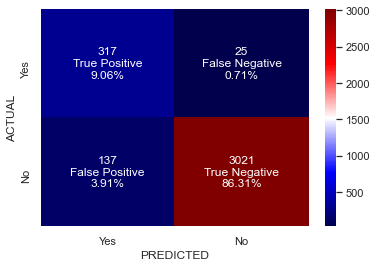

                  0
Accuracy     95.37%
Recall         0.93
Specificity    0.96
Precision      0.70
F1 Score       0.80

-------------------------------------------------
Scoring using Test Data for the Best Postpruning Model:


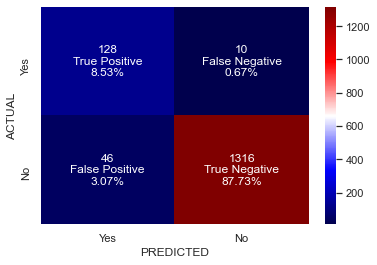

                  0
Accuracy     96.27%
Recall         0.93
Specificity    0.97
Precision      0.74
F1 Score       0.82

-------------------------------------------------


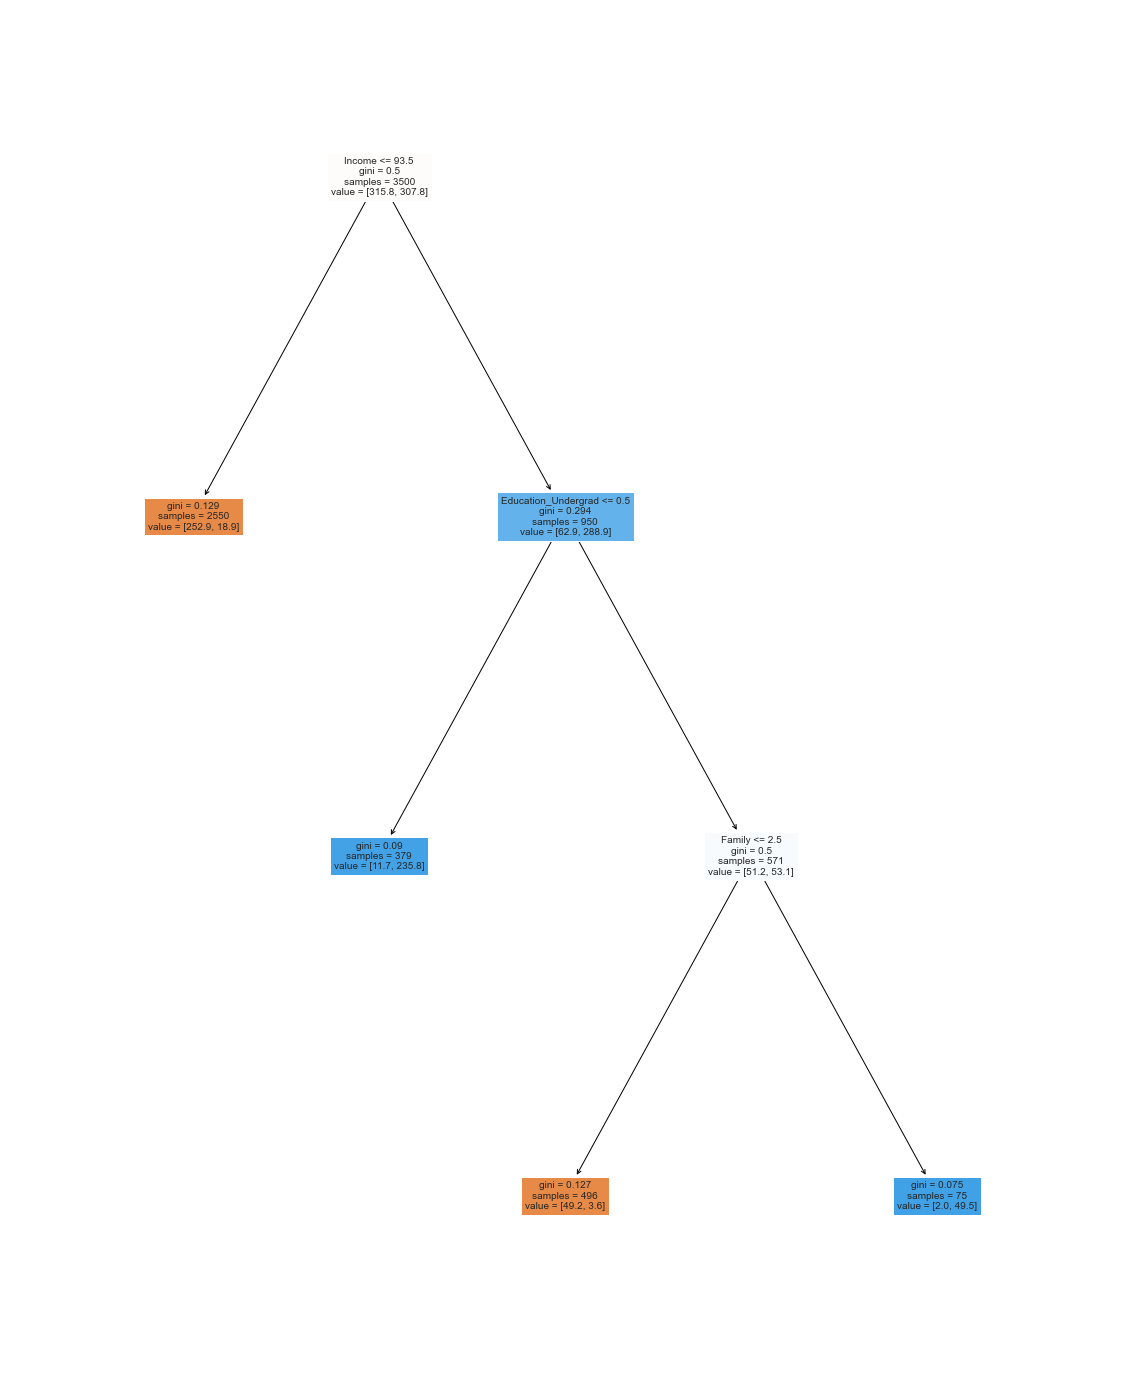

|--- Income <= 93.50
|   |--- weights: [252.90, 18.90] class: 0
|--- Income >  93.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- weights: [11.70, 235.80] class: 1
|   |--- Education_Undergrad >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [49.20, 3.60] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.00, 49.50] class: 1

                                 Importance
Age                                0.000000
County_Riverside                   0.000000
County_Sacramento                  0.000000
County_San Benito                  0.000000
County_San Bernardino              0.000000
County_San Diego                   0.000000
County_San Francisco               0.000000
County_San Joaquin                 0.000000
County_San Luis Obispo             0.000000
County_San Mateo                   0.000000
County_Santa Barbara               0.000000
County_Santa Clara                 0.000000
County_Santa Cruz                  0.000000
County_Shasta          

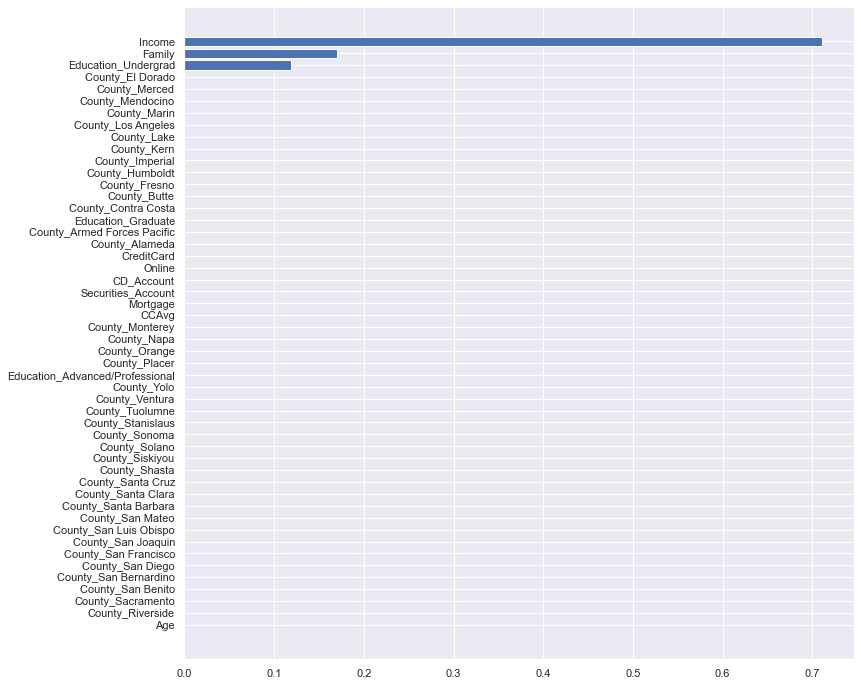

In [39]:
print('Scoring using Training Data for the Best Postpruning Model:')
cm_scoring_eval(dtree_ccp_models[49], X_train, y_train)
print('\n-------------------------------------------------')
print('Scoring using Test Data for the Best Postpruning Model:')
cm_scoring_eval(dtree_ccp_models[49], X_test, y_test)
print('\n-------------------------------------------------')
tree_visualization(dtree_ccp_models[49], X_train)

### Performance Notes:

The best postpruning model only uses three features (Income, Family, Education_Undergrad) with Income being much more important than the other two features.  

The confusion matrix metrics (train / test) were:
- Accuracy (95.37% / 96.27%)
- Recall (.93 / .93)
- Specificity (0.96 / 0.97)
- Precision (0.70 / 0.74)
- F1 Score (0.80 / 0.82)

The postpruned model is much more accurate than the prepruned model. While it does not have a recall of 1, it still maintains a 0.93 recall score. The specificity, precision, and F1 Score is substantially better.

## Model Comparisons

In [40]:
model_comparison = pd.DataFrame(index=['.5 Thresh LogReg', '.103 Thresh LogReg', '.155 Thresh LogReg', 
                                       'Full Decision Tree', 'Prepruned Decision Tree', 'Postpruned Decision Tree']) 
    # creates a dataframe for the model metrics

model_comparison['Accuracy %'] = [95.8, 90.4, 93, 98.4, 80.93, 96.27] # accuracy for the models
model_comparison['Recall'] = [.65, .93, .89, .92, 1, .93] # recall for the models
model_comparison['Specificity'] = [.99, .90, .93, .99, .79, .97] # specificity for the models
model_comparison['Precision'] = [.86, .49, .58, .91, .33, .74] # precision for the models
model_comparison['F1 Score'] = [.74, .64, .7, .91, .49, .82] # F1 Score for the models
model_comparison['False Negative %'] = [3.2, .67, 1, .73, 0, .67] # Percentage of False Negatives for the models
model_comparison['False Positive %'] = [1, 8.93, 6, .87, 19.07, 3.07] # Percentage of False Positives for the models
model_comparison['True Positive %'] = 9.2 - model_comparison['False Negative %'] # calculates TP from personal loan % in test
model_comparison['True Negative %'] = 90.8 - model_comparison['False Positive %'] 
    # calculates TN from not personal loan % in test
                                
model_comparison

,Accuracy %,Recall,Specificity,Precision,F1 Score,False Negative %,False Positive %,True Positive %,True Negative %
.5 Thresh LogReg,95.80,0.65,0.99,0.86,0.74,3.20,1.00,6.00,89.80
.103 Thresh LogReg,90.40,0.93,0.90,0.49,0.64,0.67,8.93,8.53,81.87
.155 Thresh LogReg,93.00,0.89,0.93,0.58,0.70,1.00,6.00,8.20,84.80
Full Decision Tree,98.40,0.92,0.99,0.91,0.91,0.73,0.87,8.47,89.93
Prepruned Decision Tree,80.93,1.00,0.79,0.33,0.49,0.00,19.07,9.20,71.73
Postpruned Decision Tree,96.27,0.93,0.97,0.74,0.82,0.67,3.07,8.53,87.73


### Model Comparison Notes:

The Logistic Regression model with a .5 threshold has a low recall compared to the other models. It should not be used.  
The Logistic Regression models with .103/.155 thresholds performed worse in every metric than the Postpruned Decision Tree.  
None of the Logistic Regression models should be used.  

Now we must choose between the Full Tree, the Prepruned Tree, and the Postpruned Tree.  
We can calculate the value of each tree for a given cost ratio (opportunity value : resources value) with n customers    
using <u>Profits = n( TP% * gain - FP% * loss)</u>  

For simpler numbers, let n = 10000:  
<p style = "text-indent: 40px">Full Tree profits are (847 * gain - 87 * loss)</p>  
<p style = "text-indent: 40px">Prepruned Tree profits are (920 * gain - 1907 * loss)</p>  
<p style = "text-indent: 40px">Postpruned Tree profts are (853 * gain - 307 * loss)</p>  

If the cost ratio is greater than 25:1, then we should use the Prepruned Model. This model succeeds over the other models at a high cost ratio due to the higher Recall. The low Precision means that the gains must recover the value of wasted resources, but that becomes easier as the gain per customer increases or as the marketing losses per customer decreases.   

Otherwise, we should use the Full Tree or Postpruned Model. If we need to be able to present or use the model manually, then we should eliminate the Full Tree and use the Postpruned Model instead. Otherwise, the Full Tree is better than the Postpruned Model.  

I will assume that the cost ratio is greater than 25:1 and choose the **Prepruned Model**.  

My advice for the marketing team would be to use the Prepruned Decision Tree Model and be careful how much is spent on marketing per person. Someone with a higher CCAvg or a higher Mortgage may be more likely to buy a larger personal loan, meaning larger gains, so this person could be targeted using more resources.

## Error Analysis

In [41]:
lmd_error_analysis['Predicted'] = decision_tree_preprune.predict(X) 
    # adding the predictions to the copied dataset, should not have one-hot encoding to aid with exploration
error_set = lmd_error_analysis[lmd_error_analysis['Predicted'] != lmd_error_analysis['Personal_Loan']]
    # creating a new dataset for observation where Personal Loan is different than Predicted
correct_set = lmd_error_analysis[lmd_error_analysis['Predicted'] == lmd_error_analysis['Personal_Loan']]
    # creating a new dataset for correct predictions to evaluate new rules
error_set.head() # quick view of the dataset

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Predicted
3,35,100,1,2.7,Graduate,0,0,0,0,0,0,San Francisco,1
10,65,105,4,2.4,Advanced/Professional,0,0,0,0,0,0,Alameda,1
12,48,114,2,3.8,Advanced/Professional,0,0,1,0,0,0,Santa Barbara,1
14,67,112,1,2.0,Undergrad,0,0,1,0,0,0,Los Angeles,1
24,36,152,2,3.9,Undergrad,159,0,0,0,0,1,Humboldt,1


In [42]:
print(error_set.shape) # checking how many observations were predicted incorrectly
print(f'There were {error_set["Personal_Loan"].sum()} occurrences when a customer would have bought a personal loan, ' +
      'but the model predicted "no."') # how many false negatives
print(f'There were {error_set["Predicted"].sum()} occurrences when a customer would not have bought a person loan, ' +
      'but the model predicted "yes."') # how many false positives

(1035, 13)
There were 0 occurrences when a customer would have bought a personal loan, but the model predicted "no."
There were 1035 occurrences when a customer would not have bought a person loan, but the model predicted "yes."


#### Note:  
All the errors were false positives so all values of Personal Loan are 0 and all values of Predicted are 1.  
So, there is no reason to view the Personal_Loan or Predicted columns in the graphs.  

Furthermore, the Full Tree model used Income, CCAvg, Education_Undergrad, Family, Age, and CD_Account whereas the Prepruned model only used Income and CCAvg. We should explore Education, Family, Age, and CD_Account with respect to Income and CCAvg.  

These points show incorrect predictions.


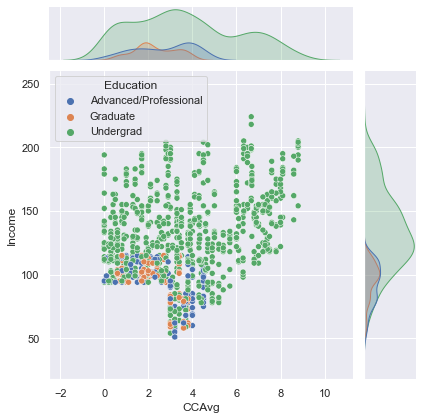

These points show correct predictions.


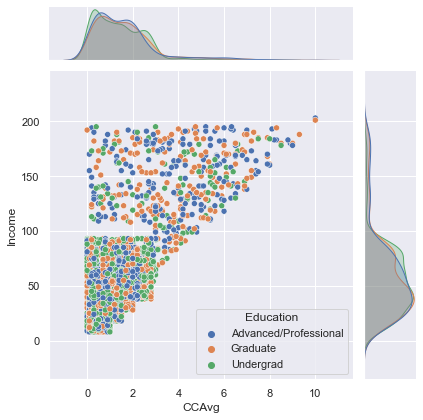


----------------------------------------------------------------------
______________________________________________________________________
These points show incorrect predictions.


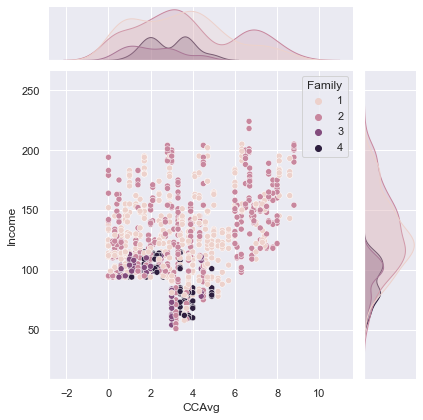

These points show correct predictions.


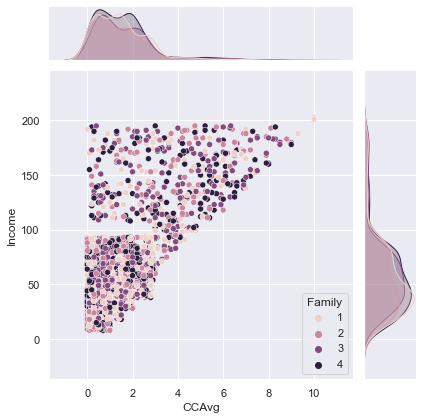


----------------------------------------------------------------------
______________________________________________________________________
These points show incorrect predictions.


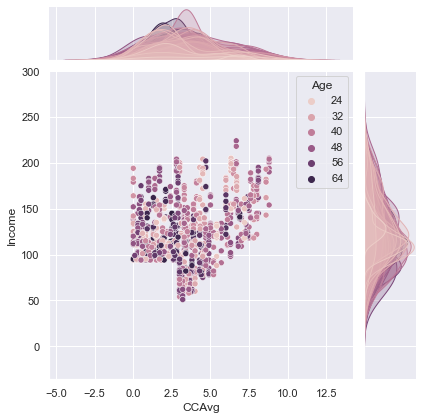

These points show correct predictions.


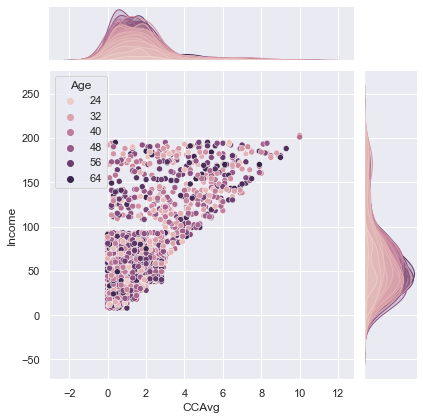


----------------------------------------------------------------------
______________________________________________________________________
These points show incorrect predictions.


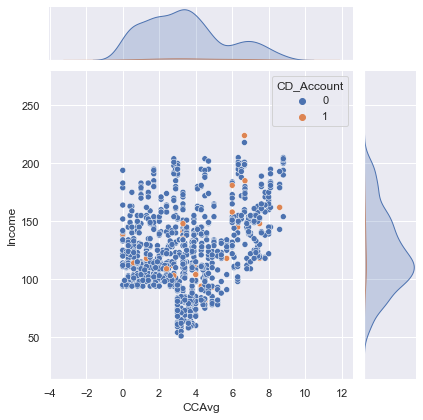

These points show correct predictions.


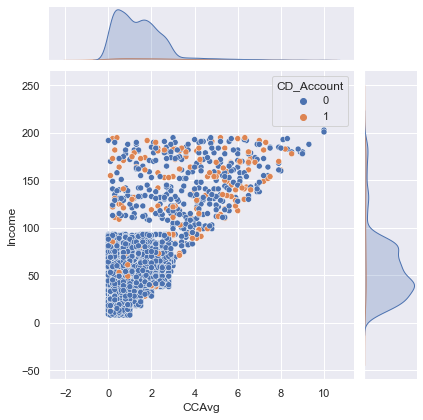


----------------------------------------------------------------------
______________________________________________________________________


In [43]:
unused_imp_var = ['Education', 'Family', 'Age', 'CD_Account'] # probably important variables

for column in unused_imp_var:
    print('These points show incorrect predictions.')
    sns.jointplot(data=error_set, x='CCAvg', y='Income', hue=column); # first plot is incorrectly predicted
    plt.show() # shows plot before creating the next plot
    print('These points show correct predictions.')
    sns.jointplot(data=correct_set, x='CCAvg', y='Income', hue=column); # second plot is correctly predicted
    plt.show() # shows plot before creating the next plot
    print('\n----------------------------------------------------------------------')
    print('______________________________________________________________________')

### Error Analysis Notes:  
The Prepruned model rules were: 

Income <= 93.50 and CCAvg <= 2.95, class: 0  
Income <= 93.50 and CCAvg > 2.95, class: 1  
Income > 93.50, class: 1  

In the second plot,  
The dense box represents the True Negatives.  
The points outside of the box represent the True Positives.  

In the first plot,  
The points represent the False Positives. There were no False Negatives.  

To improve the model, we need a space where the first plot is dense, but the second plot are sparse.  
Age and CD_Account are still too scattered to make a simple rule. The best chance is to use Family and Education.  

As all of these points in the first plot were predicted as 'yes,' we are trying to exclude as many as possible by adding rules without losing many correct personal loan predictions. If we are assuming a cost ratio of 25, then we need to exclude 25 False Positives for every True Positive that we lose.  

Maybe we could add the rule:  
CCAvg > 6.25 and Education = Undergrad, class: 0  
However, even with our best possibility it will be very close for a cost ratio of 25.  

# Conclusion:

The bank should determine the cost ratio. In order to properly determine the ideal model, we need more information about how much information is spent on each customer generally and how much each customer personal loan is worth to the bank. Gathering that information might show whether there is a pattern to the value of the personal loans for each customer, enabling the targeting of high value customers. In addition to a more detailed understanding of whom to target, the cost ratio shows how much you can spend before it is not worth the effort.  

The bank should also gather more general information like interests about customers who are predicted to buy a personal loan. This could help create more effective marketing campaigns for the targeted customers.   

Market primarily to customers with an income above $\$$93,500 and customers with an average credit card spending of $\$$2950 per month.  